### Ecommerce - Exploratory Data Analysis 
This part of the project deals with cleaning the data of the previously joined dataset. <br>
This process covers:
- detecting outliers
- imputing missing values
- merging splitted orders

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
sns.set_style('whitegrid')
plt.rc('xtick',labelsize=12)
plt.rc('ytick',labelsize=12)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [7]:
from tqdm import tqdm
import re
import sys

In [8]:
# from IPython.display import Markdown, display
# def printmd(string):
#     display(Markdown(string))

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

In [10]:
df = pd.read_csv('../resources/Brazilian_retail/brazilian_ecommerce1.csv', encoding='utf-16',
                 lineterminator='\n',
                 parse_dates=['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp',
                              'order_purchase_timestamp', 'order_approved_at',
                              'order_delivered_carrier_date', 'order_delivered_customer_date',
                              'order_estimated_delivery_date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119151 entries, 0 to 119150
Data columns (total 43 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       119151 non-null  object        
 1   customer_id                    119151 non-null  object        
 2   order_status                   119151 non-null  object        
 3   order_purchase_timestamp       119151 non-null  datetime64[ns]
 4   order_approved_at              118974 non-null  datetime64[ns]
 5   order_delivered_carrier_date   117065 non-null  datetime64[ns]
 6   order_delivered_customer_date  115730 non-null  datetime64[ns]
 7   order_estimated_delivery_date  119151 non-null  datetime64[ns]
 8   customer_unique_id             119151 non-null  object        
 9   customer_zip_code_prefix       119151 non-null  int64         
 10  customer_city                  119151 non-null  object        
 11  

In [12]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,1.0,credit_card,1.0,18.12,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,-23.680114,-46.452454,9350.0,maua,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,-23.680114,-46.452454,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,-23.680114,-46.452454,9350.0,maua,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,8d5266042046a06655c8db133d120ba5,4,Muito boa a loja,Muito bom o produto.,2018-08-08,2018-08-08 18:37:50,1.0,boleto,1.0,141.46,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,-19.810119,-43.984727,31570.0,belo horizonte,SP
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,e73b67b67587f7644d5bd1a52deb1b01,5,NaN,NaN,2018-08-18,2018-08-22 19:07:58,1.0,credit_card,3.0,179.12,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,-21.362358,-48.232976,14840.0,guariba,SP


In [13]:
df.tail()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state
119146,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,-24.001467,-46.446355,29bb71b2760d0f876dfa178a76bc4734,4,NaN,So uma peça que veio rachado mas tudo bem rs,2018-03-01,2018-03-02 17:50:01,1.0,credit_card,3.0,195.00,1.0,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,2018-02-12 13:10:37,174.90,20.10,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,-21.935321,-50.497562,17602.0,tupa,SP
119147,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,-17.891522,-39.370942,371579771219f6db2d830d50805977bb,5,NaN,Foi entregue antes do prazo.,2017-09-22,2017-09-22 23:10:57,1.0,credit_card,5.0,271.01,1.0,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,2017-09-05 15:04:16,205.99,65.02,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,-23.551013,-46.448489,8290.0,sao paulo,SP
119148,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,1.0,credit_card,4.0,441.16,1.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,-20.944706,-45.827098,37175.0,ilicinea,MG
119149,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,-22.555985,-42.690761,8ab6855b9fe9b812cd03a480a25058a1,2,NaN,Foi entregue somente 1. Quero saber do outro p...,2018-01-26,2018-01-27 09:16:56,1.0,credit_card,4.0,441.16,2.0,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,2018-01-12 21:36:21,179.99,40.59,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,-20.944706,-45.827098,37175.0,ilicinea,MG
119150,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-09 11:20:28,2018-03-09 22:11:59,2018-03-16 13:08:30,2018-04-03,60350aa974b26ff12caad89e55993bd6,83750,lapa,PR,-25.775722,-49.723981,dc9c59b4688062c25758c2be4cafc523,5,NaN,NaN,2018-03-17,2018-03-17 16:33:31,1.0,debit_card,1.0,86.86,1.0,006619bbed68b000c8ba3f8725d5409e,ececbfcff9804a2d6b40f589df8eef2b,2018-03-15 10:55:42,68.50,18.36,beleza_saude,45.0,569.0,1.0,150.0,16.0,7.0,15.0,-20.502342,-47.421590,14407.0,franca,SP


### Missing Values 
Based on the visual representation of the null values for `review_comment_title` and `review_comment_message` below we see that these features are missing the most often. Additionaly, the plot is showing that less messages are missing for the worst review ratings, whereas review titles are missing nearly evenly all over all the observations.<br>
Next, we want to investigate if the features give us enough relevant information to use them in the modelling section.

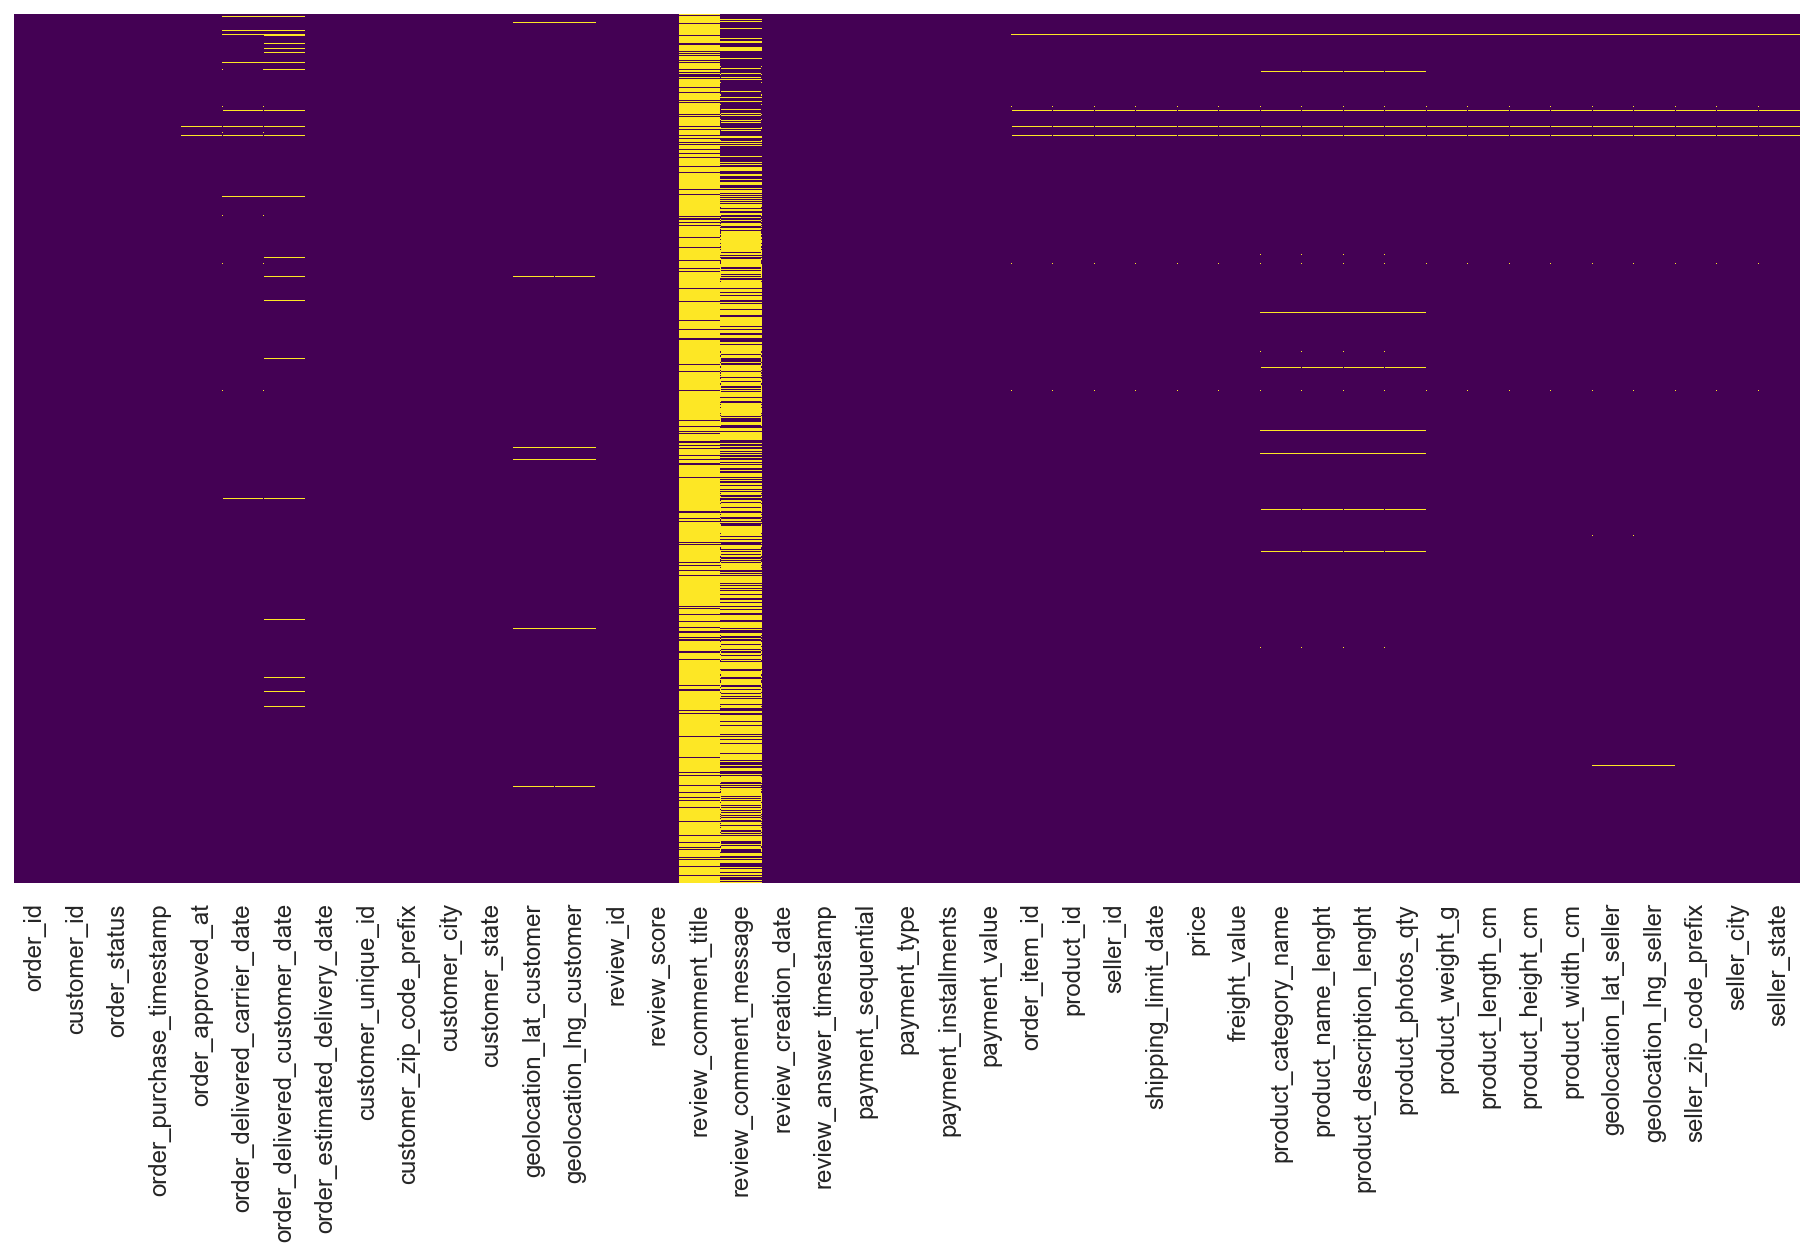

In [14]:
# getting a visual overview of the null values
plt.figure(figsize=(16,8))
sns.heatmap(df.sort_values(by='review_score', ascending=True).isnull(), 
            yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_zip_code_prefix,119151.0,35033.953253,29823.224176,1003.000000,11250.000000,24240.000000,58475.000000,99990.000000
geolocation_lat_customer,118829.0,-21.231858,5.573993,-36.605374,-23.588898,-22.929319,-20.195835,42.184003
geolocation_lng_customer,118829.0,-46.192269,4.051293,-72.666706,-48.089559,-46.631691,-43.615464,-8.577855
review_score,119151.0,3.998514,1.412529,1.000000,3.000000,5.000000,5.000000,5.000000
payment_sequential,119148.0,1.094731,0.730117,1.000000,1.000000,1.000000,1.000000,29.000000
payment_installments,119148.0,2.941426,2.777992,0.000000,1.000000,2.000000,4.000000,24.000000
payment_value,119148.0,172.735670,267.770023,0.000000,60.850000,108.160000,189.240000,13664.080000
order_item_id,118318.0,1.196530,0.699467,1.000000,1.000000,1.000000,1.000000,21.000000
price,118318.0,120.649109,184.107686,0.850000,39.900000,74.900000,134.900000,6735.000000
freight_value,118318.0,20.032587,15.836559,0.000000,13.080000,16.280000,21.180000,409.680000


In [16]:
# columns with min value of zero
df_zeros = df.describe().T.iloc[np.where(df.describe().T['min'] == 0)[0].tolist()].copy()
df_zeros.style.applymap(lambda x: 'color: red' if x == 0 else 'color: black')

,count,mean,std,min,25%,50%,75%,max
payment_installments,119148.000000,2.941426,2.777992,0.000000,1.000000,2.000000,4.000000,24.000000
payment_value,119148.000000,172.735670,267.770023,0.000000,60.850000,108.160000,189.240000,13664.080000
freight_value,118318.000000,20.032587,15.836559,0.000000,13.080000,16.280000,21.180000,409.680000
product_weight_g,118298.000000,2112.302803,3786.673988,0.000000,300.000000,700.000000,1800.000000,40425.000000


In [17]:
df.describe(include=['O']).T

,count,unique,top,freq
order_id,119151,99441,895ab968e7bb0d5659d16cd74cd1650c,63
customer_id,119151,99441,270c23a11d024a44c896d1894b261a83,63
order_status,119151,8,delivered,115731
customer_unique_id,119151,96096,9a736b248f67d166d2fbb006bcb877c3,75
customer_city,119151,4100,sao paulo,18876
customer_state,119151,27,SP,50268
review_id,119151,99173,eef5dbca8d37dfce6db7d7b16dd0525e,63
review_comment_title,14189,4600,Recomendo,498
review_comment_message,51250,36921,Muito bom,259
payment_type,119148,5,credit_card,87784


In [18]:
df.duplicated().sum()

0

In [19]:
df.isnull().sum().sort_values(ascending=False)

review_comment_title             104962
review_comment_message            67901
order_delivered_customer_date      3421
product_description_lenght         2542
product_category_name              2542
product_name_lenght                2542
product_photos_qty                 2542
order_delivered_carrier_date       2086
geolocation_lng_seller             1098
geolocation_lat_seller             1098
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853
product_id                          833
seller_city                         833
order_item_id                       833
seller_state                        833
seller_id                           833
shipping_limit_date                 833
price                               833
seller_zip_code_prefix              833
freight_value                       833
geolocation_lat_customer            322
geolocation_lng_customer            322


In [20]:
# getting the fraction of null - and existing values
review_message_fraction = [df['review_comment_message'].isnull().sum()/df.shape[0], 
                          df['review_comment_message'].notnull().sum()/df.shape[0]]
print(f'review_message_faction: {review_message_fraction}')

review_title_fraction = [df['review_comment_title'].isnull().sum()/df.shape[0],
                         df['review_comment_title'].notnull().sum()/df.shape[0]]
print(f'review_title_fraction: {review_title_fraction}')

review_message_faction: [0.5698735218336397, 0.43012647816636035]
review_title_fraction: [0.8809158127082442, 0.11908418729175584]


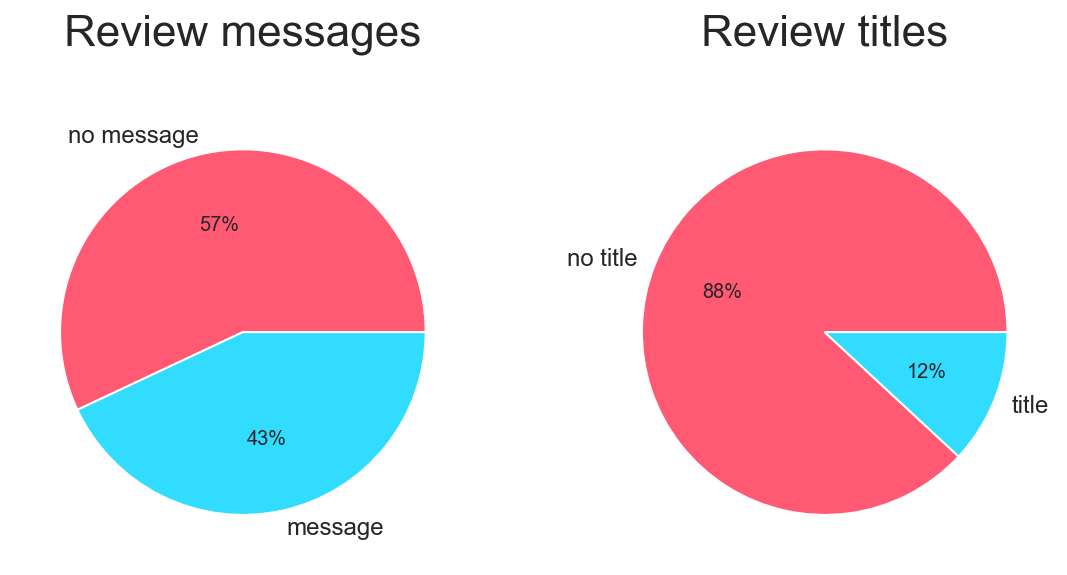

In [21]:
# plotting the fraction of review messages and review titles from above
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax[0].pie(review_message_fraction, labels=['no message', 'message'], autopct='%1.0f%%', 
        colors=['#FF5974', '#32DCFF'])
ax[0].set_title('Review messages\n', fontsize=22)

ax[1].pie(review_title_fraction, labels=['no title', 'title'], autopct='%1.0f%%', 
        colors=['#FF5974', '#32DCFF'])
ax[1].set_title('Review titles\n', fontsize=22)

plt.tight_layout()
plt.show()

### Missing Values - Review Title & Review Message
The feature `review_comment_title` is getting dropped after appearing only in around $12\,\%$ of all observations. But `review_comment_message` will be imputed with the status 'no_message', because around $43\,\%$ of all orders (splitted orders included) contain meaningful information which are needed for the classification section.

In [22]:
df.drop('review_comment_title', axis=1, inplace=True)
df['review_comment_message'].fillna(value='missing', inplace=True)

### Merging Connected Orders
Next, the problem with splitted orders will be resolved before handling the remaining missing values.<br>
In the first step the cause for having splitted orders will be discovered to write a function to obtain unique orders per observation.

In [23]:
# checking which orders appear at least twice
duplicated_order_id = df[df['order_id'].duplicated()]
duplicated_order_id_amount = duplicated_order_id['order_id'].unique().shape[0]
# printmd("<span style='color:blue'>Amount of duplicated order id's:</span> {}".format(duplicated_order_id_amount))
print("Amount of duplicated order id's: {}\n".format(duplicated_order_id_amount))

# displaying the order id's according to their occurrence in descending order
most_duplicated_order_ids = duplicated_order_id['order_id'].value_counts(ascending=False)[:10]
# printmd("<span style='color:blue'>Most duplicated order id's:</span>")
print("Most duplicated order id's:")
print("{}".format(most_duplicated_order_ids))

duplicated_order_id.head()

Amount of duplicated order id's: 12955

Most duplicated order id's:
895ab968e7bb0d5659d16cd74cd1650c    62
fedcd9f7ccdc8cba3a18defedd1a5547    37
fa65dad1b0e818e3ccc5cb0e39231352    28
ccf804e764ed5650cd8759557269dc13    25
c6492b842ac190db807c15aff21a7dd6    23
465c2e1bee4561cb39e0db8c5993aafc    23
68986e4324f6a21481df4e6e89abcf01    23
a3725dfe487d359b5be08cac48b64ec5    23
6d58638e32674bebee793a47ac4cbadc    23
285c2e15bebd4ac83635ccc563dc71f4    21
Name: order_id, dtype: int64


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,3.0,voucher,1.0,2.00,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,-23.680114,-46.452454,9350.0,maua,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,a54f0611adc9ed256b57ede6b6eb5114,4,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48,2.0,voucher,1.0,18.59,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,-23.680114,-46.452454,9350.0,maua,SP
12,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23,299905e3934e9e181bfb2e164dd4b4f8,18075,sorocaba,SP,-23.478754,-47.467931,abc5655186d40772bd6e410420e6a3ed,5,missing,2017-08-17,2017-08-18 01:47:32,1.0,credit_card,1.0,8.34,1.0,9a78fb9862b10749a117f7fc3c31f051,7c67e1448b00f6e969d365cea6b010ab,2017-08-11 12:05:32,149.99,19.77,moveis_escritorio,45.0,527.0,1.0,9750.0,42.0,41.0,42.0,-23.482623,-46.374490,8577.0,itaquaquecetuba,SP
14,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,f2a85dec752b8517b5e58a06ff3cd937,20780,rio de janeiro,RJ,-22.886501,-43.268834,15898b543726a832d4137fbef5d1d00e,1,Aguardando retorno da loja,2017-05-30,2017-05-30 23:13:47,1.0,credit_card,1.0,259.06,2.0,08574b074924071f4e201e151b152b4e,001cca7ae9ae17fb1caed9dfb1094831,2017-05-22 19:50:18,99.00,30.53,ferramentas_jardim,36.0,450.0,1.0,9000.0,42.0,12.0,39.0,-20.297537,-40.400869,29156.0,cariacica,ES
24,83018ec114eee8641c97e08f7b4e926f,7f8c8b9c2ae27bf3300f670c3d478be8,delivered,2017-10-26 15:54:26,2017-10-26 16:08:14,2017-10-26 21:46:53,2017-11-08 22:22:00,2017-11-23,634f09f6075fe9032e6c19609ffe995a,44024,feira de santana,BA,-12.244947,-38.980318,219cf59cf889bc85babbd1cd1fe30f2d,4,missing,2017-11-09,2017-11-10 01:06:29,3.0,voucher,1.0,24.86,1.0,c35498fbb4358837ae16850f50c3fd22,70a12e78e608ac31179aea7f8422044b,2017-11-01 16:07:35,76.00,16.97,telefonia,59.0,973.0,1.0,325.0,19.0,8.0,22.0,-23.298186,-45.974828,12327.0,jacarei,SP


In [24]:
# taking the most frequently order id and selecting only features that are changing
most_order_id = df[df['order_id'] == most_duplicated_order_ids.index[0]]
most_order_id_changed_feature = most_order_id.apply(lambda x: x.nunique() > 1)
most_order_id[most_order_id_changed_feature.index[most_order_id_changed_feature]] \
                                           .sort_values(by=['product_id', 'payment_sequential', 'order_item_id'])
# annotation: payment_sequential, order_item_id and product_id are reasons for getting a split of the single order

,payment_sequential,payment_value,order_item_id,product_id,seller_id,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state
85519,1.0,2.61,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85537,2.0,2.61,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85552,3.0,2.61,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85531,4.0,2.61,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85555,5.0,2.61,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85576,6.0,2.61,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85561,7.0,2.60,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85546,8.0,0.41,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85573,9.0,2.61,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC
85558,10.0,16.70,3.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC


In [25]:
# after investigating the most_duplicated_order_ids to find causes for a split, the index 6 shows another reason
# displaying changing review features of most_duplicated_order_ids 
most_order_id = df[df['order_id'] == most_duplicated_order_ids.index[5]]
most_order_id_changed_feature = most_order_id.apply(lambda x: x.nunique() > 1)
most_order_id[most_order_id_changed_feature.index[most_order_id_changed_feature]]
# annotation: review_id (respectively review_comment_message) causes a split of an order

,payment_sequential,payment_type,payment_installments,payment_value,order_item_id
52200,8.0,voucher,1.0,41.03,1.0
52201,8.0,voucher,1.0,41.03,2.0
52202,4.0,voucher,1.0,59.40,1.0
52203,4.0,voucher,1.0,59.40,2.0
52204,2.0,voucher,1.0,26.18,1.0
52205,2.0,voucher,1.0,26.18,2.0
52206,3.0,voucher,1.0,35.59,1.0
52207,3.0,voucher,1.0,35.59,2.0
52208,7.0,voucher,1.0,15.19,1.0
52209,7.0,voucher,1.0,15.19,2.0


In [26]:
# checking if order status is changing per single order (splitted delivery)
delivered_status = df.groupby('order_id')['order_status'].apply(lambda x: ('|').join(x.unique()))
delivered_status.str.contains('\|').sum()

0

In [27]:
# checking if payment installments could cause a split
pay_install_not_1 = df.loc[df['payment_installments'] != 1.0, 'order_id'].value_counts()
# pay_install_not_1.index is 'order_id'
pay_install_changing = df.loc[df['order_id'].isin(pay_install_not_1.loc[pay_install_not_1 > 1].index)] \
                         .sort_values('order_id', ascending=False)
pay_install_changing[['order_id', 'payment_installments', 'payment_sequential', 'order_item_id']][:14]

# annotation: without deeper investigation it looks like that payment_sequential and order_item_id 
# are the cause for a split in the order records

,order_id,payment_installments,payment_sequential,order_item_id
101898,fff8287bbae429a99bb7e8c21d151c41,4.0,1.0,2.0
101897,fff8287bbae429a99bb7e8c21d151c41,4.0,1.0,1.0
77666,ffd6f465cab015b452d398ac1f5d978a,2.0,1.0,2.0
77667,ffd6f465cab015b452d398ac1f5d978a,2.0,1.0,3.0
77665,ffd6f465cab015b452d398ac1f5d978a,2.0,1.0,1.0
34973,ffc16cecff8dc037f60458f28d1c1ba5,8.0,1.0,2.0
34972,ffc16cecff8dc037f60458f28d1c1ba5,8.0,1.0,1.0
55384,ffb9a9cd00c74c11c24aa30b3d78e03b,6.0,1.0,1.0
55385,ffb9a9cd00c74c11c24aa30b3d78e03b,6.0,1.0,2.0
55386,ffb9a9cd00c74c11c24aa30b3d78e03b,6.0,1.0,3.0


### Merging Connected Orders - Conclusion
Following features can cause a split of an order: <br>
- `product_id`: different products per order
- `order_item_id`: several units of the same product
- `payment_sequential`: paying in several steps
- `review_id`: sending several reviews for the same order

In the further process splitted orders will be merged per product based on above conditions.

In [28]:
# IMPORTANT: due to performance reasons this function needs to be changed in the future
def merge_splitted_order(df_original, order_ids):
    """
    This function merges splitted orders. It returns a DataFrame where the order is merged per product.
    For merged orders the `order_item_id` column is represented as the amount of unique numbers, 
    the `payment_sequential` as the maximum amount of sequential payments, the `payment_value` is 
    aggregated to the total cost of the original order, the `payment_type` and 
    `review_comment_message` columns as a concatenation of each payment method respectively of each
    review comment.
    Additionally a new column `delivery_weight` is added which returns the total weight for this order 
    by multiplying the product weight with the number of purchased items. 
    
    Parameters:
    df_original (DataFrame): whole order DataFrame
    order_ids (List): a list of order ids 
    
    Returns:
    df (DataFrame): DataFrame of orders merged by product_id
    """
    df = df_original.copy()
    df['delivery_weight'] = np.NaN
    df_subset_list = []
    
    if type(order_ids) != list:
        order_ids = [order_ids]
        
    for order_id in tqdm(order_ids):
        try:     
            df_subset = df[df['order_id'] == order_id].copy()
            # set none value of payment_type to "Missing" to prevent error
            if df_subset['payment_type'].isna().any():
                pay_null = df_subset['payment_type'].isnull()
                df_subset.loc[pay_null[pay_null].index, 'payment_type'] = 'missing'
            
            items_aggs = df_subset.groupby('product_id') \
                                  .agg({'order_item_id': 'nunique',
                                        'payment_sequential': 'max', # the overall payment_sequential is used for each product
                                        'payment_value': 'sum',  # needs to be divided by the number of order_item_id and represents the total payment for the order
                                        'payment_type': lambda cat: (', ').join(cat.unique()),
                                        'review_comment_message': lambda msg:  (' ').join(['' if msg.nunique() > 1 and txt == 'missing' else txt for txt in msg.unique()])})
     
            items_aggs.reset_index(inplace=True)

            items_aggs_last = df_subset.drop(['order_item_id', 
                                              'payment_sequential',
                                              'payment_type', 
                                              'payment_value',
                                              'review_comment_message'], axis=1).groupby('product_id').last()
            
            items_aggs_last.reset_index(inplace=True)

            items = pd.merge(left=items_aggs, right=items_aggs_last, how='inner', on='product_id')
            items['payment_value'] = items[['payment_value', 'order_item_id']].apply(lambda cols: cols['payment_value']/cols['order_item_id'], axis=1)
            
            df.drop(df_subset.index.tolist(), inplace=True)
            df_subset_list.append(items)

        except Exception as e:
            print(f"Error at order id: {df_subset['order_id'].unique()[0]}")
            print(e)
        
    df = pd.concat([df, *df_subset_list], ignore_index=True)
    df['delivery_weight'] = df.apply(lambda x: x['order_item_id'] * x['product_weight_g'], axis=1)
        
    return df


In [29]:
# example of merge_splitted_order with 
df_most_orders = df[df['order_id'] == most_duplicated_order_ids.index[0]].copy()
merge_splitted_order(df_most_orders, most_duplicated_order_ids.index[0])

100%|██████████| 1/1 [00:00<00:00, 47.27it/s]


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state,delivery_weight
0,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,-23.583687,-46.569762,eef5dbca8d37dfce6db7d7b16dd0525e,5,missing,2017-08-15,2017-08-17 22:17:55,21.0,voucher,1.0,161.32,1.0,5ddab10d5e0a23acb99acf56b62b3276,3d0cd21d41671c46f82cd11176bf7277,2017-08-14 20:43:31,83.80,5.12,utilidades_domesticas,56.0,548.0,8.0,450.0,30.0,20.0,11.0,-26.285093,-48.870103,89217.0,joinville,SC,450.0
1,895ab968e7bb0d5659d16cd74cd1650c,270c23a11d024a44c896d1894b261a83,delivered,2017-08-08 20:26:31,2017-08-08 20:43:31,2017-08-10 11:58:14,2017-08-14 12:46:18,2017-08-30,9a736b248f67d166d2fbb006bcb877c3,3227,sao paulo,SP,-23.583687,-46.569762,eef5dbca8d37dfce6db7d7b16dd0525e,5,missing,2017-08-15,2017-08-17 22:17:55,21.0,voucher,1.0,161.32,2.0,ebf9bc6cd600eadd681384e3116fda85,822166ed1e47908f7cfb49946d03c726,2017-08-14 20:43:31,12.99,23.21,cama_mesa_banho,37.0,86.0,2.0,1300.0,50.0,9.0,41.0,-22.114932,-43.204184,25803.0,tres rios,RJ,2600.0


In [30]:
# getting splitted order ids (product_id is handled with order_item_id)
order_ids = df.groupby('order_id').apply(lambda x: (x['order_item_id'].nunique() > 1) | 
                                                   (x['payment_sequential'].nunique() > 1) | 
                                                   (x['review_id'].nunique() > 1))

order_id_list = order_ids[order_ids].index.tolist()
print(f'Dataframe shape before: {df.shape}')

df_orders = merge_splitted_order(df, order_id_list)
print(f'DataFrame shape after: {df_orders.shape}')

  0%|          | 2/12955 [00:00<15:43, 13.73it/s]

Dataframe shape before: (119151, 42)


100%|██████████| 12955/12955 [10:37<00:00, 20.32it/s]


DataFrame shape after: (103172, 43)


In [31]:
# order_item_id is now called order_item, because it only annotates anymore how many product items are ordered
df_orders.rename(columns={'order_item_id': 'order_item'}, inplace=True)

### Merging Connected Orders - Function
The merged dataframe after running the function `merge_splitted_order` is saved in a new csv file, because of it unefficient implementation it lasts quite long. This needs to be improved in the future.

In [32]:
if __name__ != '__main__':
    df_orders.to_csv('../resources/Brazilian_retail/ecommerce_orders_cleaned_2.csv', index=False)

In [33]:
df = pd.read_csv('../resources/Brazilian_retail/ecommerce_orders_cleaned_2.csv',
                 lineterminator='\n',
                 parse_dates=['shipping_limit_date', 'review_creation_date', 'review_answer_timestamp',
                              'order_purchase_timestamp', 'order_approved_at',
                              'order_delivered_carrier_date', 'order_delivered_customer_date',
                              'order_estimated_delivery_date'])

### Clean DataFrame
The next section deals with examining the aggregated features and if necessary cleaning incorrect entries. Some cases aren't handled yet in the merging function and need to be implemented in the future.

In [34]:
duplicated_order_ids = set(df[df['order_id'].duplicated()]['order_id'])
df[df['order_id'].isin(duplicated_order_ids)][['order_id', 'product_id', 'order_item', 'payment_sequential', 
                                               'payment_type', 'payment_value', 'freight_value', 'price', 'review_comment_message', 
                                               'delivery_weight', 'product_weight_g']].head()

,order_id,product_id,order_item,payment_sequential,payment_type,payment_value,freight_value,price,review_comment_message,delivery_weight,product_weight_g
86493,002f98c0f7efd42638ed6100ca699b42,880be32f4db1d9f6e2bec38fb6ac23ab,1.0,1.0,credit_card,93.62,7.16,44.90,missing,200.0,200.0
86494,002f98c0f7efd42638ed6100ca699b42,d41dc2f2979f52d75d78714b378d4068,1.0,1.0,credit_card,93.62,32.57,8.99,missing,450.0,450.0
86496,00337fe25a3780b3424d9ad7c5a4b35e,13944d17b257432717fd260e69853140,1.0,1.0,credit_card,139.68,9.94,59.90,missing,400.0,400.0
86497,00337fe25a3780b3424d9ad7c5a4b35e,1f9799a175f50c9fa725984775cac5c5,1.0,1.0,credit_card,139.68,9.94,59.90,missing,1000.0,1000.0
86504,005d9a5423d47281ac463a968b3936fb,4c3ae5db49258df0784827bdacf3b396,2.0,1.0,credit_card,145.26,13.58,24.99,Ainda não recebi todos os produtos,200.0,100.0


In [35]:
# checking payment_type entries
df[df['order_id'].isin(duplicated_order_ids)]['payment_type'].unique()

array(['credit_card', 'boleto', 'debit_card', 'voucher, credit_card',
       'credit_card, voucher', 'voucher'], dtype=object)

In [36]:
df['payment_type'].value_counts()

credit_card                77144
boleto                     20456
voucher                     1658
debit_card                  1589
credit_card, voucher        1161
voucher, credit_card        1159
not_defined                    3
credit_card, debit_card        1
missing                        1
Name: payment_type, dtype: int64

In [37]:
# if credit_card and voucher is included as payment_type then keep the order like:
# 'credit_card, voucher'
df.loc[df['payment_type'].str.contains('credit_card, voucher|voucher, credit_card', regex=True), 
       'payment_type'] = 'credit_card, voucher'
df['payment_type'].replace('not_defined', 'missing', inplace=True);

In [38]:
# most common messages
df[df['order_id'].isin(duplicated_order_ids)]['review_comment_message'].value_counts()[:8]

missing                                                                     3034
muito bom                                                                     12
Muito bom                                                                     12
Otimo                                                                          9
Bom                                                                            7
Tudo conforme previsto.                                                        7
Ótimos produtos                                                                7
não chegaram todos os produtos\r\nestá chegando cada dia um, em separado       6
Name: review_comment_message, dtype: int64

In [39]:
# Showing merged orders where at least one message column was empty and another wasn't.
# This case should be handled in the merge_splitted_order function!
df[df['review_comment_message'].str.contains('missing')]['review_comment_message'].value_counts().head(10)

missing    59449
Name: review_comment_message, dtype: int64

In [40]:
# error while merging dataframes?
df[df['review_comment_message'].str.contains('Então Gostei Mais')] \
  [['review_comment_message', 'order_id', 'customer_id']]

,review_comment_message,order_id,customer_id
90260,Então Gostei Mais veio diferente do que eu pe...,39948b49e7e68844f9f5a31d12a3c4c6,810d6e6ff6e67c94075b39488b77632c
90261,Então Gostei Mais veio diferente do que eu pe...,39948b49e7e68844f9f5a31d12a3c4c6,810d6e6ff6e67c94075b39488b77632c
99536,Então Gostei Mais veio diferente do que eu ped...,c86cd0844d36479f7e7adb1edd5e59d3,6e2e17641815b48dd565b5c6506a4891


In [41]:
df.loc[[90260,90261, 99536]]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state,delivery_weight
90260,39948b49e7e68844f9f5a31d12a3c4c6,810d6e6ff6e67c94075b39488b77632c,delivered,2018-03-20 17:23:39,2018-03-22 02:50:09,2018-03-27 19:03:57,2018-03-28 20:06:36,2018-04-06,384d6654ad80e9f1426b7a4ef9e40997,13145,paulinia,SP,-22.733061,-47.178291,bf796bbf98859accfb3e19189995b931,3,Então Gostei Mais veio diferente do que eu pe...,2018-03-30,2018-04-05 02:08:02,1.0,boleto,1.0,588.64,1.0,a92044ede94468b593b5e4d92498f6c1,cca3071e3e9bb7d12640c9fbe2301306,2018-03-28 02:50:09,129.34,17.82,moveis_decoracao,58.0,560.0,1.0,2200.0,43.0,11.0,35.0,-21.766477,-48.831547,14940.0,ibitinga,SP,2200.0
90261,39948b49e7e68844f9f5a31d12a3c4c6,810d6e6ff6e67c94075b39488b77632c,delivered,2018-03-20 17:23:39,2018-03-22 02:50:09,2018-03-27 19:03:57,2018-03-28 20:06:36,2018-04-06,384d6654ad80e9f1426b7a4ef9e40997,13145,paulinia,SP,-22.733061,-47.178291,bf796bbf98859accfb3e19189995b931,3,Então Gostei Mais veio diferente do que eu pe...,2018-03-30,2018-04-05 02:08:02,1.0,boleto,1.0,588.64,1.0,b4ce8d32dea944f1720681420c4cd5ef,cca3071e3e9bb7d12640c9fbe2301306,2018-03-28 02:50:09,129.34,17.82,cama_mesa_banho,58.0,560.0,1.0,2050.0,43.0,11.0,35.0,-21.766477,-48.831547,14940.0,ibitinga,SP,2050.0
99536,c86cd0844d36479f7e7adb1edd5e59d3,6e2e17641815b48dd565b5c6506a4891,delivered,2018-03-20 17:23:39,2018-03-22 02:50:06,2018-03-22 20:48:34,2018-03-29 23:19:49,2018-04-06,384d6654ad80e9f1426b7a4ef9e40997,13145,paulinia,SP,-22.733061,-47.178291,71c578d79c27a6b55335ac05d30f0cd5,4,Então Gostei Mais veio diferente do que eu ped...,2018-03-29,2018-03-30 09:43:18,1.0,boleto,1.0,246.42,1.0,8e26e1c242d575871d8074986b625bfa,1900267e848ceeba8fa32d80c1a5f5a8,2018-03-28 02:50:06,110.00,13.21,cama_mesa_banho,45.0,415.0,1.0,2150.0,16.0,10.0,16.0,-21.766477,-48.831547,14940.0,ibitinga,SP,2150.0


### Missing Values
The following section deals with imputing the remaining missing values.

Therefor, the imputation of a specific feature is tried to be done by investigating similar entries from other orders to find the correct value. Only after this procedure doesn't lead to success a general imputation technique is applied.

In [42]:
df.isnull().sum().sort_values(ascending=False)[:30]

order_delivered_customer_date    2977
product_name_lenght              2207
product_category_name            2207
product_description_lenght       2207
product_photos_qty               2207
order_delivered_carrier_date     1774
geolocation_lng_seller            972
geolocation_lat_seller            972
product_weight_g                  763
delivery_weight                   763
product_length_cm                 763
product_height_cm                 763
product_width_cm                  763
freight_value                     747
price                             747
shipping_limit_date               747
seller_id                         747
product_id                        747
order_item                        747
seller_state                      747
seller_zip_code_prefix            747
seller_city                       747
geolocation_lng_customer          286
geolocation_lat_customer          286
order_approved_at                 156
payment_installments                1
payment_sequ

In [43]:
df[df['seller_id'].isnull()].shape

(747, 43)

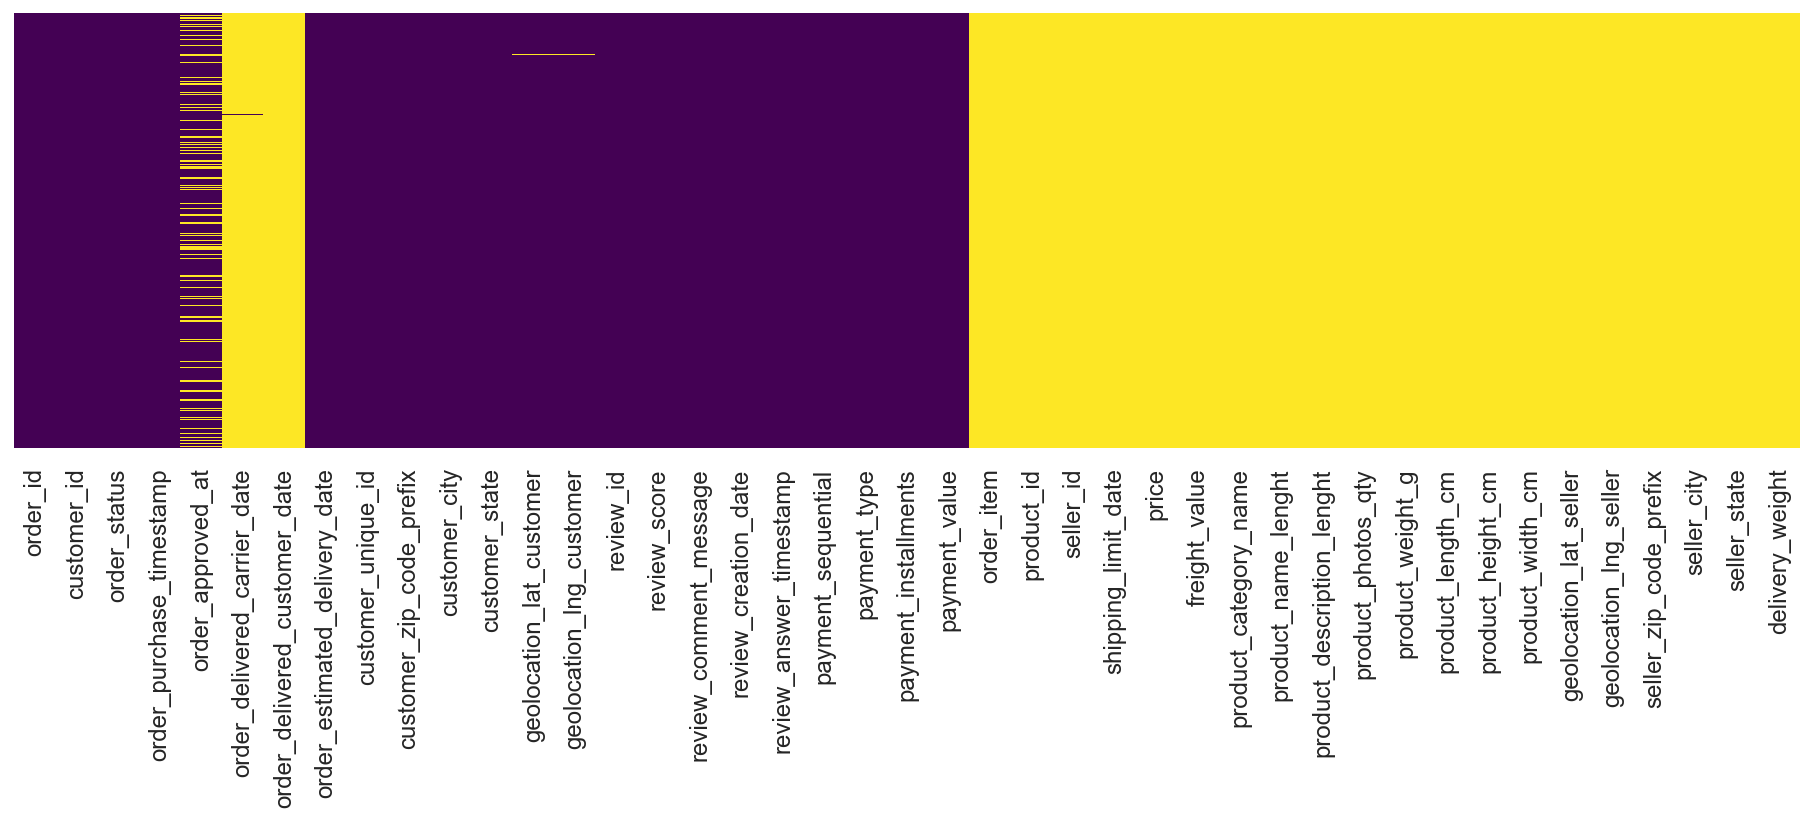

In [44]:
plt.figure(figsize=(16,4))
sns.heatmap(df[df['seller_id'].isnull()].isnull(), 
            yticklabels=False, cbar=False, cmap='viridis')
plt.show()

In [45]:
# Seller_id can't be imputed easily (except they belong all togther to one new single seller), 
# that's why they are dropped
df.drop(df[df['seller_id'].isnull()].index, inplace=True)

In [46]:
df.isnull().sum().sort_values(ascending=False)[:20]

order_delivered_customer_date    2230
product_photos_qty               1460
product_category_name            1460
product_name_lenght              1460
product_description_lenght       1460
order_delivered_carrier_date     1028
geolocation_lng_customer          283
geolocation_lat_customer          283
geolocation_lng_seller            225
geolocation_lat_seller            225
delivery_weight                    16
product_weight_g                   16
product_height_cm                  16
product_width_cm                   16
product_length_cm                  16
order_approved_at                  14
payment_sequential                  1
payment_installments                1
product_id                          0
customer_state                      0
dtype: int64

In [47]:
product_missing_info = df[(df['product_weight_g'].isnull()) &
                          (df['product_category_name'].isnull())]['product_id']
product_missing_info.nunique()

1

In [48]:
# No direct imputation about this product can be made, because no complete information about it could be found.
df[df['product_id'] == product_missing_info.iloc[0]].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state,delivery_weight
6438,6e150190fbe04c642a9cf0b80d83ee16,135a42a465867ff932f1222f71a3efb2,delivered,2017-06-24 16:33:35,2017-06-24 16:45:14,2017-06-29 16:08:40,2017-07-07 18:35:52,2017-07-31,c5628087b9b42549720ee8b57f0a6a98,78600,barra do garcas,MT,-15.876364,-52.263206,3a1e44f9d4660e76dd8c550f1afae888,5,loja confiável estou satisfeito com a aquisiçã...,2017-07-08,2017-07-10 18:31:23,1.0,credit_card,2.0,55.79,1.0,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-06-30 16:45:14,39.0,16.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.298186,-45.974828,12327.0,jacarei,SP,NaN
24470,1521c6bb7b1028154c8c67cf80fa809f,ca29b2bf57243228e98eab2dab805ae9,delivered,2017-04-02 10:00:43,2017-04-02 10:10:16,2017-04-04 16:19:55,2017-04-18 13:53:58,2017-05-04,eabb0c62caa8436a85aa820d2ac1323b,73105,brasilia,DF,-15.654091,-47.860892,d3326d58985f61faf6b5e61e07d58cf0,5,sempre comprei na lannister.com e nunca tive n...,2017-04-19,2017-04-20 13:17:27,1.0,credit_card,4.0,45.05,1.0,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-07 10:10:16,29.0,16.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.298186,-45.974828,12327.0,jacarei,SP,NaN
27583,e3daea0200104991cb979c2fcc509ae7,4730251e8934a542a009d77dfd027375,delivered,2017-03-30 14:07:44,2017-03-30 14:22:36,2017-03-31 22:06:32,2017-04-07 14:43:38,2017-04-25,8f5f778f80efda903eb24efe69d2a6c3,14340,brodowski,SP,-20.984969,-47.662790,86adf80f185cb0b6c9e61e2b9e9bb0c4,1,"Simplesmente recebi um produto na cor errada, ...",2017-04-08,2017-04-09 01:43:47,1.0,credit_card,3.0,39.96,1.0,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-06 14:22:36,29.0,10.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.298186,-45.974828,12327.0,jacarei,SP,NaN
35844,101157d4fae1c9fb74a00a5dee265c25,f72b2f8d9295ef93fd40a4c49f67a42b,delivered,2017-04-03 07:54:34,2017-04-04 08:02:26,2017-04-12 08:58:13,2017-04-13 21:08:08,2017-05-02,a330c3cd4e607dd2f8dca4e303325e6f,22631,rio de janeiro,RJ,-23.004309,-43.324508,57a934e60ad82d078eb474eb608a2d39,5,"Produto excelente, entregue antes do prazo",2017-04-14,2017-04-15 10:36:47,1.0,credit_card,1.0,43.52,1.0,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-04-11 08:02:26,29.0,14.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.298186,-45.974828,12327.0,jacarei,SP,NaN
39777,bf49f84a0580ef6751e13357776b7ed9,e7f41abe62db82cffe5c8f6138f18fb2,delivered,2017-07-02 21:25:56,2017-07-02 21:35:18,2017-07-04 15:35:12,2017-07-11 16:47:17,2017-07-28,5a06bd3849da761b21e0bd78eeda8688,83880,rio negro,PR,-26.086448,-49.780751,2a7c6aeb8b1b043dce9a9704322d25ae,5,Ótimo produto recomendo,2017-07-12,2017-07-14 23:07:15,1.0,credit_card,6.0,61.14,1.0,5eb564652db742ff8f28759cd8d2652a,4e922959ae960d389249c378d1c939f5,2017-07-09 21:35:18,39.0,15.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-23.298186,-45.974828,12327.0,jacarei,SP,NaN


In [49]:
# product weight is missing, but product id is given
# there is a chance to find the missing values based on a probably fully described observation of that product id
df[(df['product_weight_g'].isnull()) & (df['product_id'].notnull())].shape

(16, 43)

In [50]:
no_category_name = df[df['product_category_name'].isnull()].sample(5)
no_category_name

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state,delivery_weight
97011,a1f23fda3d0d3b220ff9fa6472233fdf,9e6531ec2ebbf1bc5971bdddd96e67a1,delivered,2017-03-23 16:56:19,2017-03-23 17:05:29,2017-03-27 12:38:40,2017-03-29 09:23:43,2017-04-13,3f0fc819e0772c79adc298b081dbae04,6850,itapecerica da serra,SP,-23.704047,-46.851424,b46f242183f298af750cffebd948f8f0,3,missing,2017-03-30,2017-03-30 21:55:00,1.0,credit_card,6.0,128.64,2.0,e0f33a3329af6716a0bb47fd7a664439,7e26c750b4cb9f6766f58265ff9ebe95,2017-03-29 17:05:29,49.80,14.52,NaN,NaN,NaN,NaN,200.0,16.0,13.0,14.0,-19.924685,-43.904323,30270.0,belo horizonte,MG,400.0
40468,914e07017d246eee143555a432b6746e,a41f7c579dd43b7e3de0b0a5a5f796f9,delivered,2018-02-06 14:15:39,2018-02-06 15:55:59,2018-02-09 21:04:15,2018-02-20 13:32:20,2018-02-22,4ca788859535d4a3dc70dc0938e062ba,2611,sao paulo,SP,-23.466590,-46.639282,bebd50827cad0d8ccfede9693135276f,4,estou contente por receber os produtos. creio ...,2018-02-21,2018-02-21 19:21:53,1.0,credit_card,2.0,169.70,1.0,3b60d513e90300a4e9833e5cda1f1d61,c826c40d7b19f62a09e2d7c5e7295ee2,2018-02-12 15:55:59,159.77,9.93,NaN,NaN,NaN,NaN,450.0,20.0,12.0,15.0,-23.440079,-46.511449,7133.0,guarulhos,SP,450.0
96386,98f0e2b0d85754ca3b4e06d70f0f63a2,af046fdbbda4a307d96801ebe61482c4,delivered,2018-03-04 21:04:35,2018-03-04 21:28:29,2018-03-06 00:53:16,2018-03-12 18:56:30,2018-03-22,0fdc0d21e1983e8af4d399e17671f76d,32315,contagem,MG,-19.946048,-44.033582,e4e248958b4f689dbb6de6470b8f7f22,5,"Chegou antes do previsto, muito obrigado",2018-03-13,2018-03-13 22:43:03,2.0,credit_card,2.0,112.20,1.0,3d4784f9a07ca5de370c86800589c860,c826c40d7b19f62a09e2d7c5e7295ee2,2018-03-08 21:28:29,97.77,14.43,NaN,NaN,NaN,NaN,1350.0,16.0,7.0,20.0,-23.440079,-46.511449,7133.0,guarulhos,SP,1350.0
77685,0e75e6ce3e632eb1473af3854f583029,1b222a0f1414bd06b17256aebafaa498,delivered,2017-04-24 10:14:16,2017-04-26 10:34:20,2017-04-28 09:14:11,2017-05-02 13:47:08,2017-05-15,f398130a46d78d120674c62552f3922d,31260,belo horizonte,MG,-19.867166,-43.935134,66324736353b079d49b880c214c7f425,5,"Produto conforme anunciado, de boa qualidade",2017-05-03,2017-05-04 14:16:26,1.0,credit_card,3.0,47.42,1.0,1b0e39ec889889ea1d492603d8512bfb,e26901d5ab434ce92fd9b5c256820a4e,2017-05-03 10:34:20,32.90,14.52,NaN,NaN,NaN,NaN,400.0,35.0,30.0,20.0,-23.680114,-46.452454,9350.0,maua,SP,400.0
21982,48d0129c92992c4ee4c6b7b034c63336,85d622312fac76fa9a79eece3fe2eb9d,delivered,2017-11-21 19:48:09,2017-11-21 19:58:58,2017-11-23 18:32:48,2017-12-12 22:03:09,2017-12-18,317fd05046ea3f266ec94e1910400b72,56302,petrolina,PE,-9.397964,-40.495597,3820724f79c7d3e53bdc60cad3a90f45,4,"Pedido chegou no prazo, colar de acordo com si...",2017-12-13,2017-12-16 01:51:11,1.0,credit_card,4.0,58.53,1.0,ae9d8ccddc081b66d656332ddf9b2373,e5a3438891c0bfdb9394643f95273d8e,2017-11-27 19:58:28,32.90,25.63,NaN,NaN,NaN,NaN,200.0,16.0,2.0,11.0,-22.568350,-47.447439,13483.0,limeira,SP,200.0


In [51]:
# test to find the missing category name of a product based on other orders 
# unfortunately each order does not declare the product category name
df[df['product_id'] == no_category_name['product_id'].iloc[0]].iloc[:, -18:].head()

,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state,delivery_weight
8464,7e26c750b4cb9f6766f58265ff9ebe95,2017-06-08 20:05:14,49.8,8.11,NaN,NaN,NaN,NaN,200.0,16.0,13.0,14.0,-19.924685,-43.904323,30270.0,belo horizonte,MG,200.0
17313,7e26c750b4cb9f6766f58265ff9ebe95,2017-04-10 11:23:15,49.8,14.52,NaN,NaN,NaN,NaN,200.0,16.0,13.0,14.0,-19.924685,-43.904323,30270.0,belo horizonte,MG,200.0
24601,7e26c750b4cb9f6766f58265ff9ebe95,2017-05-07 21:55:18,49.8,16.05,NaN,NaN,NaN,NaN,200.0,16.0,13.0,14.0,-19.924685,-43.904323,30270.0,belo horizonte,MG,200.0
30053,7e26c750b4cb9f6766f58265ff9ebe95,2017-02-14 15:32:14,49.8,14.52,NaN,NaN,NaN,NaN,200.0,16.0,13.0,14.0,-19.924685,-43.904323,30270.0,belo horizonte,MG,200.0
37653,7e26c750b4cb9f6766f58265ff9ebe95,2017-09-04 22:06:28,49.8,14.10,NaN,NaN,NaN,NaN,200.0,16.0,13.0,14.0,-19.924685,-43.904323,30270.0,belo horizonte,MG,200.0


In [52]:
def find_product_info(df, order, verbose=0):
    """
    This function takes a DataFrame of orders and a specific order with incomplete 
    product information and searchs for the product in the given DataFrame.
    If successful, it returns the product information about:
        - product_category_name
        - product_name_length
        - product_description_length
        - product_photos_qty
    
    Parameters:
    df (DataFrame): DataFrame with all orders
    order (DataFrame): a single order 
    verbose (integer): returns a error message when an error occurs (verbose > 0)
    
    Returns:
    results (tuple): when successful, it returns a tuple of following features: 
                        - product_category_name
                        - product_name_length
                        - product_description_length
                        - product_photos_qty,
                      else it returns None
    """
    try:
        weight = order['product_weight_g'].iloc[0]
        length = order['product_length_cm'].iloc[0]
        height = order['product_height_cm'].iloc[0]
        width = order['product_width_cm'].iloc[0]
        #state = order['seller_state'].iloc[0]
        price = order['price'].iloc[0]
        
        results = None
        
        potential_product = df[(df['product_weight_g'] == weight) &
                               (df['product_length_cm'] == length) &
                               (df['product_height_cm'] == height) &
                               (df['product_width_cm'] == width) &
                               #(df['seller_state'] == state) &
                               (df['price'] == price)]
        
        p = potential_product[potential_product[['product_category_name', 'product_name_lenght', 
                                                 'product_description_lenght', 'product_photos_qty']] \
                            .notnull().all(axis=1)]
       
        if not p.empty:
            results = (
                        p['product_category_name'].iloc[0],
                        p['product_name_lenght'].iloc[0],
                        p['product_description_lenght'].iloc[0],
                        p['product_photos_qty'].iloc[0]
                     )
        return results
       
        
    except Exception as e:
        if verbose > 0:
            print(f"Error in order: {order['order_id']}")
            print(e)
            print(f'Error at line: {sys.exc_info()[-1].tb_lineno}')

In [53]:
incomplete_products = df[df[['product_category_name', 'product_name_lenght', 
                             'product_description_lenght', 'product_photos_qty']].isnull().all(axis=1)]

no_product_info = []

for i, product in tqdm(incomplete_products.iterrows()):
    product = pd.DataFrame(product).T
    product_info = find_product_info(df, product, 1)
    if product_info:
        df.loc[i, ['product_category_name', 'product_name_lenght', 
                   'product_description_lenght', 'product_photos_qty']] = product_info
    else:
        no_product_info.append(i)

1460it [00:09, 157.79it/s]


### Missing Values - Products
Only product information of 131 products were found directly and the remaining products need to be imputed with a standard technique.

In [54]:
print(f'Amount of products with missing product information: {len(incomplete_products)}')
print(f'Amount of imputed products: {len(incomplete_products) - len(no_product_info)}')

Amount of products with missing product information: 1460
Amount of imputed products: 131


In [55]:
df[df['delivery_weight'].isnull()][['order_item', 'product_weight_g']].head()

,order_item,product_weight_g
6438,1.0,NaN
24470,1.0,NaN
27583,1.0,NaN
33362,1.0,NaN
35844,1.0,NaN


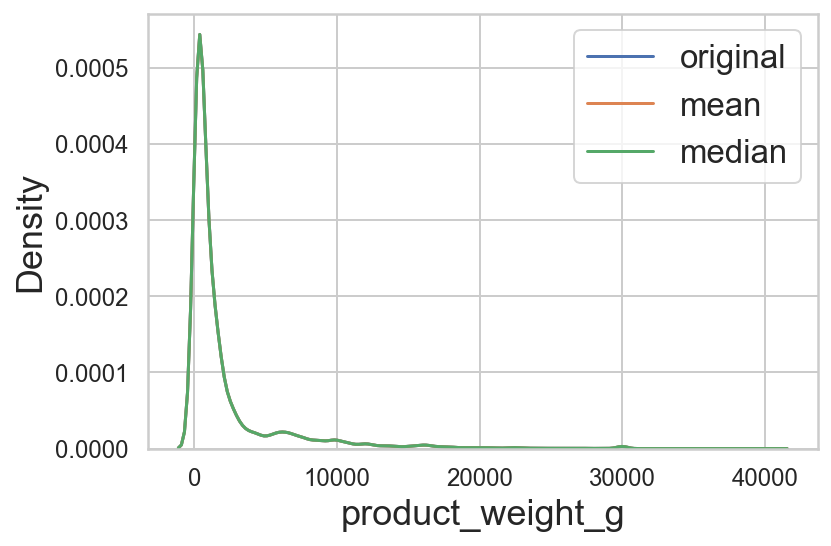

In [56]:
plt.figure(figsize=(6,4))
sns.kdeplot(df['product_weight_g'], label='original')
sns.kdeplot(df['product_weight_g'].fillna(value=df['product_weight_g'].mean()), label='mean', alpha=.5)
sns.kdeplot(df['product_weight_g'].fillna(value=df['product_weight_g'].median()), label='median', alpha=.5)
plt.legend()
plt.show()

In [57]:
product_info_missing_mask = df[['product_width_cm', 'delivery_weight', 'product_weight_g', 
                                'product_length_cm', 'product_height_cm']].isnull().any(axis=1)
df[product_info_missing_mask].shape[0]

16

In [58]:
# missing product information, but category name known
product_info_missing = df[(product_info_missing_mask) &
                          (df['product_category_name'].notnull())]
product_info_missing

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state,delivery_weight
33362,85f8ad45e067abd694b627859fa57453,1d088dea8732788ec35dd4ee6dd76112,delivered,2017-01-29 21:40:02,2017-01-30 22:32:20,2017-02-02 05:04:58,2017-02-07 10:46:00,2017-03-08,69b2b29382af03e03e486ad307a76000,90160,porto alegre,RS,-30.049304,-51.21316,125af5098b160c059cd60bafcc1f6ad1,5,missing,2017-02-08,2017-02-09 10:09:24,1.0,credit_card,10.0,1961.0,1.0,09ff539a621711667c43eba6a3bd8466,8b8cfc8305aa441e4239358c9f6f2485,2017-02-03 21:40:02,1934.0,27.0,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN,-23.306635,-51.16455,86020.0,londrina,PR,NaN


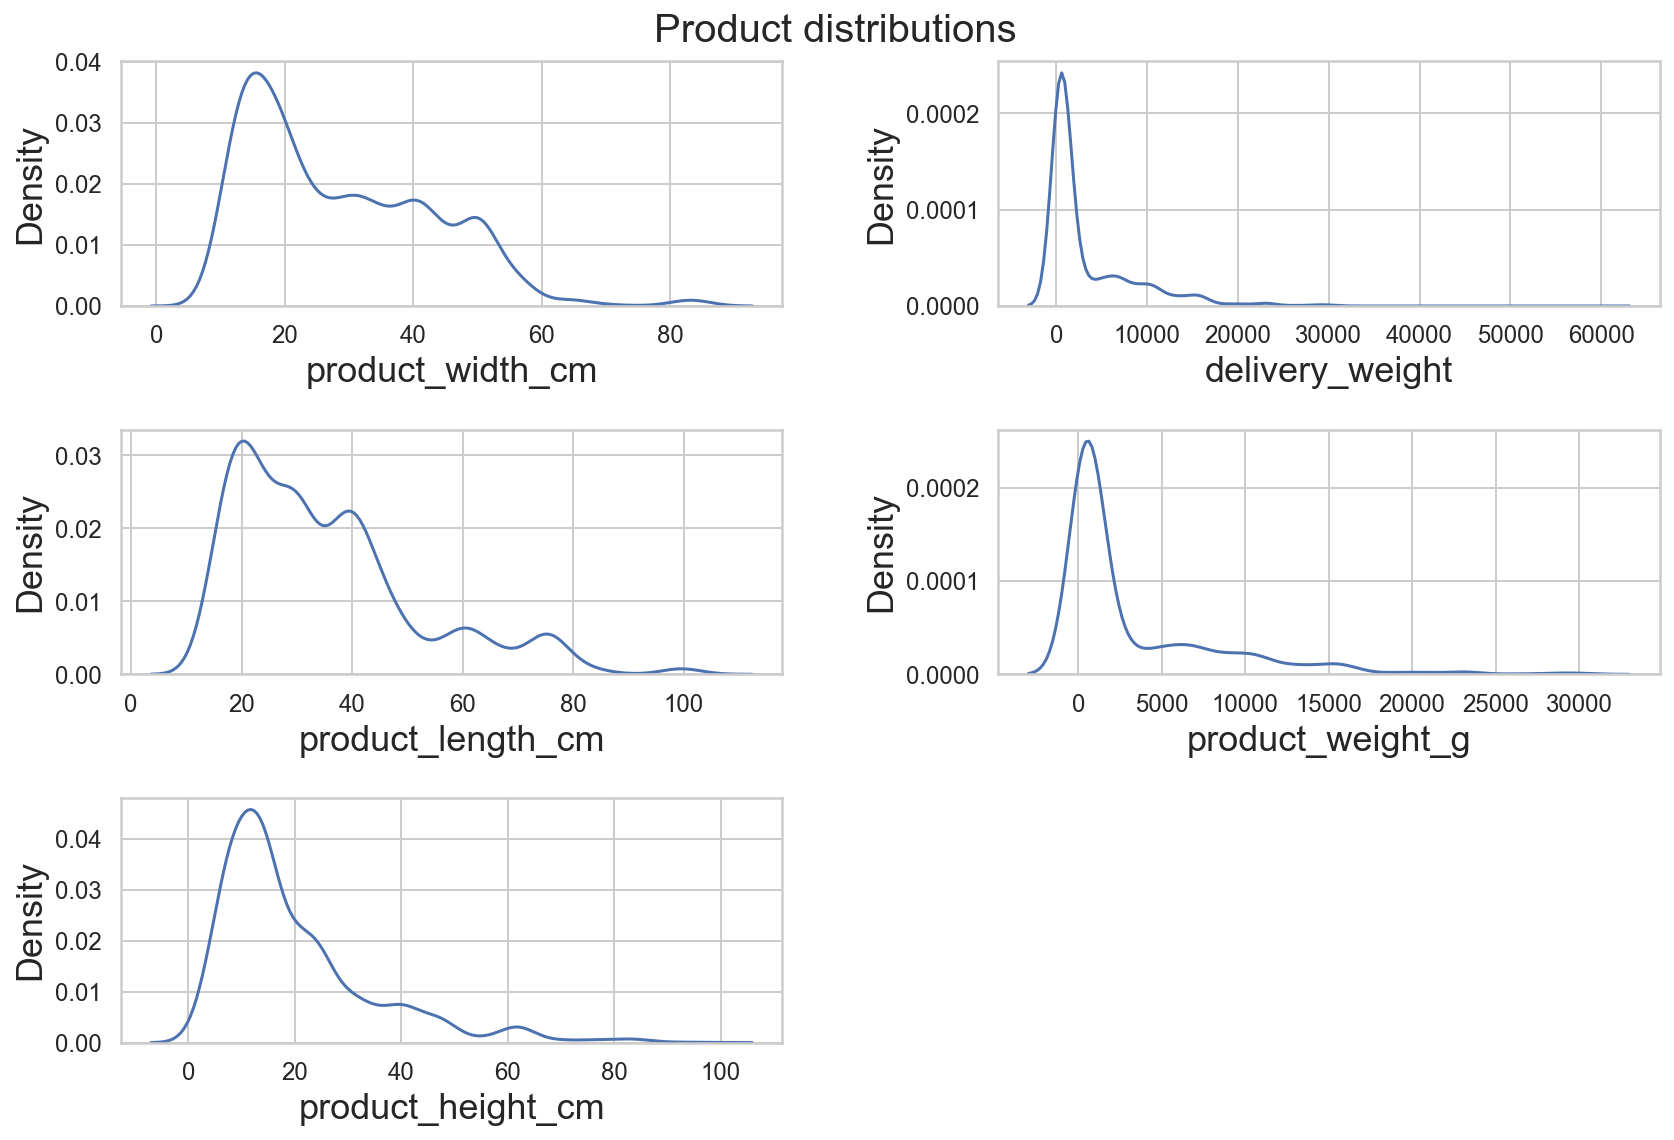

In [59]:
categories = df['product_category_name']
cat = product_info_missing['product_category_name'].values[0]

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(12,8))
fig.delaxes(ax[2,1])
sns.kdeplot(df[categories == cat]['product_width_cm'], ax=ax[0,0])
sns.kdeplot(df[categories == cat]['delivery_weight'], ax=ax[0, 1])
sns.kdeplot(df[categories == cat]['product_length_cm'], ax=ax[1, 0])
sns.kdeplot(df[categories == cat]['product_weight_g'], ax=ax[1,1])
sns.kdeplot(df[categories == cat]['product_height_cm'], ax=ax[2,0])
plt.suptitle('Product distributions', fontsize=20, y=1)
plt.tight_layout(pad=2.0, w_pad=4)

plt.show()

In [60]:
# the product with the category name 'bebes' is imputed with the median values 
# for the missing product info, because each distribution is positively skewed
(bebes_width_median,
bebes_delivery_median,
bebes_length_median,
bebes_weight_median,
bebes_height_median) = df.groupby('product_category_name')[['product_width_cm', 'delivery_weight', 'product_weight_g', 
                             'product_length_cm', 'product_height_cm']].median().loc['bebes'].values

In [61]:
df.loc[product_info_missing.index[0], ['product_width_cm', 'delivery_weight', 'product_weight_g', 
                             'product_length_cm', 'product_height_cm']] = (bebes_width_median,
                                                                           bebes_delivery_median,
                                                                           bebes_length_median,
                                                                           bebes_weight_median,
                                                                           bebes_height_median)

### Dates - Imputation & Feature Engineering
This section imputes missing dates and creates two new date features.<br>
`carrier_approved_diff` describes the time difference of the approval from the platform and order timestamp.<br>
`customer_carrier_diff` describes the time difference of order confirmation from the carrier and the delivery timestamp.

Missing dates are calculated based on the average time duration of the specific seller if available, otherwise it takes the average time duration of all sellers.

In [62]:
date_columns = df.select_dtypes(include=[np.datetime64]).columns
date_columns

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_creation_date',
       'review_answer_timestamp', 'shipping_limit_date'],
      dtype='object')

In [63]:
# getting the rows with dates where no date is missing 
df_date = df[np.append(date_columns, 'seller_id')].copy().dropna()
df_date.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date,review_answer_timestamp,shipping_limit_date,seller_id
0,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,2018-08-08,2018-08-08 18:37:50,2018-07-30 03:24:27,289cdb325fb7e7f891c38608bf9e0962
1,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,2018-08-18,2018-08-22 19:07:58,2018-08-13 08:55:23,4869f7a5dfa277a7dca6462dcf3b52b2
2,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,2017-12-03,2017-12-05 19:21:58,2017-11-23 19:45:59,66922902710d126a0e7d26b0e3805106
3,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2018-02-17,2018-02-18 13:02:51,2018-02-19 20:31:37,2c9e548be18521d1c43cde1c582c6de8
4,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,2017-07-27,2017-07-27 22:48:30,2017-07-13 22:10:13,8581055ce74af1daba164fdbd55a40de


In [64]:
df_date['carrier_approved_diff'] = df_date.apply(lambda date: date['order_delivered_carrier_date'] - \
                                                              date['order_approved_at'], axis=1)
df_date['customer_carrier_diff'] = df_date.apply(lambda date: date['order_delivered_customer_date'] - \
                                                              date['order_delivered_carrier_date'], axis=1)

A few timestamps from the dataset include falsly declared data which can lead to even negative time differences in the new columns called `carrier_approved_diff` and `customer_carrier_diff`. These date data originate from the unchanged dataset. In order to get more realistic date data each `order_delivered_carrier_date` or `order_delivered_customer_date` value that would generate negative time differences is first set to zero. Afterwards, each null value from the named columns is replaced to the specific median value from the corresponding seller.

In [65]:
shortest_carrier_approved_diff_idx = df_date[['carrier_approved_diff']] \
                                            .sort_values('carrier_approved_diff')[:5].index
df_date.loc[shortest_carrier_approved_diff_idx, ['order_delivered_carrier_date', 
                                                 'order_approved_at',
                                                 'carrier_approved_diff']] \
                        .style \
                        .applymap(lambda x: 'color: red' if x < pd.Timedelta(0) else 'color: black',
                                  subset=['carrier_approved_diff'])

,order_delivered_carrier_date,order_approved_at,carrier_approved_diff
22513,2018-01-26 13:35:00,2018-07-16 18:50:22,-172 days +18:44:38
12701,2017-09-04 13:10:23,2017-09-13 22:06:11,-10 days +15:04:12
40177,2017-09-04 14:05:50,2017-09-13 22:17:15,-10 days +15:48:35
85861,2017-09-04 18:07:55,2017-09-13 22:03:51,-10 days +20:04:04
95190,2017-09-04 19:12:19,2017-09-13 21:58:04,-10 days +21:14:15


In [66]:
shortest_customer_carrier_diff_idx = df_date[['customer_carrier_diff']] \
                                            .sort_values('customer_carrier_diff')[:5].index
df_date.loc[shortest_customer_carrier_diff_idx, ['order_delivered_customer_date', 
                                                 'order_delivered_carrier_date',
                                                 'customer_carrier_diff']] \
                        .style \
                        .applymap(lambda x: 'color: red' if x < pd.Timedelta(0) else 'color: black',
                                  subset=['customer_carrier_diff'])

,order_delivered_customer_date,order_delivered_carrier_date,customer_carrier_diff
99086,2017-02-14 15:15:57,2017-03-02 17:34:26,-17 days +21:41:31
99087,2017-02-14 15:15:57,2017-03-02 17:34:26,-17 days +21:41:31
102809,2017-08-01 21:13:01,2017-08-09 18:18:43,-8 days +02:54:18
102810,2017-08-01 21:13:01,2017-08-09 18:18:43,-8 days +02:54:18
89171,2017-06-02 11:09:16,2017-06-09 15:07:29,-8 days +20:01:47


In [67]:
df_date_drop_1_idx = df_date[df_date['carrier_approved_diff'] < pd.Timedelta(0)].index
df_date_drop_2_idx = df_date[df_date['customer_carrier_diff'] < pd.Timedelta(0)].index
df_date_drop_idx = list(set(np.append(df_date_drop_1_idx, df_date_drop_2_idx)))
df_date.drop(df_date_drop_idx, inplace=True)

In [68]:
df.loc[df_date_drop_1_idx, ['order_delivered_carrier_date']] = pd.NaT
df.loc[df_date_drop_2_idx, ['order_delivered_customer_date']] = pd.NaT

In [69]:
# getting average carrier_approved_diff feature of each seller
# timestamp rounding (frequency s: seconds)
date_carrier_medians = df_date.groupby('seller_id')['carrier_approved_diff'].apply(lambda d: d.median().round('s'))
date_carrier_medians.head()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532   1 days 17:28:47
001cca7ae9ae17fb1caed9dfb1094831   1 days 16:07:46
002100f778ceb8431b7a1020ff7ab48f   2 days 17:06:06
003554e2dce176b5555353e4f3555ac8   0 days 12:34:01
004c9cd9d87a3c30c522c48c4fc07416   1 days 01:40:54
Name: carrier_approved_diff, dtype: timedelta64[ns]

In [70]:
# getting average customer_carrier_diff feature of each seller
date_customer_medians = df_date.groupby('seller_id')['customer_carrier_diff'].apply(lambda d: d.median().round('s'))
date_customer_medians.head()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532    7 days 04:35:02
001cca7ae9ae17fb1caed9dfb1094831    8 days 05:10:16
002100f778ceb8431b7a1020ff7ab48f    9 days 22:43:56
003554e2dce176b5555353e4f3555ac8    4 days 02:38:45
004c9cd9d87a3c30c522c48c4fc07416   10 days 04:14:36
Name: customer_carrier_diff, dtype: timedelta64[ns]

In [71]:
# overview of missing dates
df_dates_missing = df[df[date_columns].isnull().any(axis=1)][np.append(date_columns, 'seller_id')]
print('# of observations with any missing date data:', df_dates_missing.shape[0])
df_dates_missing.head()

# of observations with any missing date data: 3706


,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date,review_answer_timestamp,shipping_limit_date,seller_id
5,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,2017-05-13,2017-05-13 20:25:42,2017-04-19 13:25:17,dc8798cbf453b7e0f98745e396cc5616
12,2018-06-07 19:03:12,2018-06-12 23:31:02,NaT,2018-06-21 15:34:32,2018-07-04,2018-07-03,2018-07-03 15:10:07,2018-06-18 18:59:02,89a51f50b8095ea78d5768f34c13a76f
39,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28,2018-07-01,2018-07-11 20:41:18,2018-06-13 04:30:33,e9779976487b77c6d4ac45f75ec7afe9
88,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,2018-08-25,2018-08-29 10:48:52,2018-08-13 06:15:14,28405831a29823802aa22c084cfd0649
109,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,2017-10-05,2017-10-05 12:55:11,2017-09-20 14:30:09,fa74b2f3287d296e9fbd2cc80f2d1cf1


In [72]:
def get_median_date(date, date_medians, seller_id):
    """
    Takes in a beginning date and the median time duration of each seller to compute 
    a new date based on a specific seller.
    
    Parameters:
    date (Timestamp): starting date
    date_medians (numpy.timedelta64): series of median time durations of each specific seller
    seller_id (string): seller id
    
    Returns:
    new_date (Timestamp): new date for a specific seller
    """
    try:
        new_date = date + date_medians.loc[seller_id]
    except:
        new_date = np.nan
    return new_date

In [73]:
# imputing missing 'order_delivered_carrier_date' and 'order_delivered_customer_date' features
# apply mean value if date is missing else returning given date
df_dates_missing.loc[:, 'order_delivered_carrier_date'] =  \
    df_dates_missing.apply(lambda x: get_median_date(x['order_approved_at'], 
                                                      date_carrier_medians,
                                                      x['seller_id']) 
                           if pd.isnull(x['order_delivered_carrier_date'])
                           else x['order_delivered_carrier_date'], axis=1)

df_dates_missing.loc[:, 'order_delivered_customer_date'] = \
    df_dates_missing.apply(lambda x: get_median_date(x['order_approved_at'],
                                                      date_customer_medians,
                                                      x['seller_id']) 
                           if pd.isnull(x['order_delivered_customer_date'])
                           else x['order_delivered_customer_date'], axis=1)

In [74]:
df_dates_missing.head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_creation_date,review_answer_timestamp,shipping_limit_date,seller_id
5,2017-04-11 12:22:08,2017-04-13 13:25:17,2017-04-18 09:37:30,2017-04-18 15:25:41,2017-05-09,2017-05-13,2017-05-13 20:25:42,2017-04-19 13:25:17,dc8798cbf453b7e0f98745e396cc5616
12,2018-06-07 19:03:12,2018-06-12 23:31:02,2018-06-13 19:29:43,2018-06-21 15:34:32,2018-07-04,2018-07-03,2018-07-03 15:10:07,2018-06-18 18:59:02,89a51f50b8095ea78d5768f34c13a76f
39,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,2018-06-10 04:26:53,2018-06-28,2018-07-01,2018-07-11 20:41:18,2018-06-13 04:30:33,e9779976487b77c6d4ac45f75ec7afe9
88,2018-08-03 17:44:42,2018-08-07 06:15:14,2018-08-11 14:37:02,2018-08-08 17:33:31,2018-08-21,2018-08-25,2018-08-29 10:48:52,2018-08-13 06:15:14,28405831a29823802aa22c084cfd0649
109,2017-09-03 14:22:03,2017-09-03 14:30:09,2017-09-11 14:19:18,2017-09-15 17:27:09,2017-10-03,2017-10-05,2017-10-05 12:55:11,2017-09-20 14:30:09,fa74b2f3287d296e9fbd2cc80f2d1cf1


In [75]:
df_dates_missing.shape

(3706, 9)

In [76]:
# actually new calculated timestamps
df_dates_missing.dropna().shape

(3512, 9)

In [77]:
# inserting the new calculated timestamps
df.loc[df_dates_missing.dropna().index, ['order_delivered_carrier_date', 'order_delivered_customer_date']] = \
    df_dates_missing[['order_delivered_carrier_date', 'order_delivered_customer_date']].dropna()

In [78]:
# orders where no time could be calculated
remaining_missing_dates = df[df[['order_delivered_carrier_date', 'order_delivered_customer_date']] \
                             .isnull().any(axis=1)]
remaining_missing_dates.shape

(180, 43)

In [79]:
# average time duration of all sellers
date_carrier_medians_total = df_date['carrier_approved_diff'].median().round('s')
print(f"""Median time difference between "order_delivered_carrier_date" and
"order_approved_at": {date_carrier_medians_total}""")
print()
date_customer_medians_total = df_date['customer_carrier_diff'].median().round('s')
print(f"""Median time difference between "order_delivered_customer_date" and
"order_approved_at": {date_customer_medians_total}""")

Median time difference between "order_delivered_carrier_date" and
"order_approved_at": 1 days 20:16:09

Median time difference between "order_delivered_customer_date" and
"order_approved_at": 7 days 02:15:46


In [80]:
df[df['order_approved_at'].isnull()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_message,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,order_item,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state,delivery_weight
4680,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17,8a9a08c7ca8900a200d83cf838a07e0b,6708,cotia,SP,-23.585162,-46.841815,5d0fd5deb7e6a4f952cf63cc52cc18e3,4,"Muita demora, mas, tudo ok.\r\nTerezinha",2017-03-21,2017-03-21 17:35:02,1.0,boleto,1.0,349.01,1.0,0e20a07ca1714df21f9b07ca3bf7c682,4e7c18b98d84e05cbae3ff0ff03846c2,2017-02-22 13:40:00,309.90,39.11,eletroportateis,41.0,675.0,2.0,20800.0,75.0,40.0,40.0,-21.250593,-48.317620,14882.0,jaboticabal,SP,20800.0
14423,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21,91efb7fcabc17925099dced52435837f,93548,novo hamburgo,RS,-29.690980,-51.116358,a2f476daadcb4b1f28542a6eabf99612,5,missing,2017-03-03,2017-03-04 23:25:49,1.0,boleto,1.0,396.86,1.0,2c2b6a28924791234bd386bddb17512e,a4b6b9b992b46e9ef863637af96e04bc,2017-02-22 11:45:31,379.00,17.86,construcao_ferramentas_seguranca,56.0,498.0,1.0,1008.0,33.0,14.0,26.0,-27.589021,-48.598946,88090.0,florianopolis,SC,1008.0
16566,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17,e1f01a1bd6485e58ad3c769a5427d8a8,8230,sao paulo,SP,-23.516641,-46.447514,4fd6d43fb8b2bad8cc665aa96b82accc,5,missing,2017-03-02,2017-03-03 07:21:03,1.0,boleto,1.0,65.52,1.0,583916a5dae918f5e89baec139141c54,3481aa57cd91f9f9d3fa1fa12d9a3bf7,2017-02-22 12:29:47,49.99,15.53,NaN,NaN,NaN,NaN,3100.0,28.0,28.0,50.0,-23.012214,-47.522040,13360.0,capivari,SP,3100.0
19731,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31,7e1a5ca61b572d76b64b6688b9f96473,62700,caninde,CE,-4.357711,-39.314913,4930703ae4fccd4d2d3b44cf63a9e632,5,missing,2017-03-10,2017-03-13 00:18:46,1.0,boleto,1.0,106.81,1.0,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-22 15:48:35,79.99,26.82,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,-23.554079,-46.533242,3426.0,sao paulo,SP,1200.0
20161,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20,c8822fce1d0bfa7ddf0da24fff947172,27945,macae,RJ,-22.370400,-41.795154,4e44dd381f3c4f7afddacf8b9aa0c47a,5,missing,2017-03-03,2017-03-04 00:06:38,1.0,boleto,1.0,95.76,1.0,c6dd917a0be2a704582055949915ab32,7a67c85e85bb2ce8582c35f2203ad736,2017-02-21 12:05:55,79.99,15.77,cool_stuff,54.0,1012.0,1.0,1200.0,42.0,25.0,15.0,-23.554079,-46.533242,3426.0,sao paulo,SP,1200.0


In [81]:
# using average time duration of all sellers for the remaining missing dates
df.loc[remaining_missing_dates.index, 'order_delivered_carrier_date'] = \
    remaining_missing_dates.apply(lambda x: x['order_approved_at'] + date_carrier_medians_total, axis=1)

df.loc[remaining_missing_dates.index, 'order_delivered_customer_date'] = \
    remaining_missing_dates.apply(lambda x: x['order_approved_at'] + date_customer_medians_total, axis=1)

In [82]:
df[df['order_approved_at'].isnull()].iloc[:, :6].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date
4680,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47
14423,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52
16566,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25
19731,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10
20161,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11


In [83]:
# difference between order was done and order was approved by the website
df['order_approved_diff'] = df.apply(lambda x: x['order_approved_at'] - x['order_purchase_timestamp'], axis=1)

In [84]:
# average order_approved_diff per seller
approval_median_times = df[df[['order_approved_at', 'order_purchase_timestamp']] \
                                 .notnull().all(axis=1)] \
                                 .groupby('seller_id')['order_approved_diff'] \
                                 .apply(lambda d: d.median().round('s'))
approval_median_times.head()

seller_id
0015a82c2db000af6aaaf3ae2ecb0532   0 days 15:39:46
001cca7ae9ae17fb1caed9dfb1094831   0 days 00:18:04
001e6ad469a905060d959994f1b41e4f   0 days 00:14:46
002100f778ceb8431b7a1020ff7ab48f   0 days 00:18:03
003554e2dce176b5555353e4f3555ac8   0 days 00:18:38
Name: order_approved_diff, dtype: timedelta64[ns]

In [85]:
def get_order_diff(obs, time_span):
    """
    Takes in a row of a DataFrame which includes order_purchase_timestamp, 
    order_delivered_carrier_date and seller_id features, and the average time durations of
    each seller to return a new timestamp. 
    
    Parameters:
    obs (DataFrame): one row of a DataFrame which includes order_purchase_timestamp, 
                     order_delivered_carrier_date and 'seller_id'
    time_span (numpy.timedelta64): time duration 
    
    Returns:
    approved_date (Timestamp): new timestamp by adding time_span and order_pruchase_timestamp
    """
    approved_date = pd.NaT
    try:
        seller_id = obs['seller_id']
        new_date = obs['order_purchase_timestamp'] + time_span.loc[seller_id]
        if obs['order_delivered_carrier_date'] > new_date:
            approved_date = new_date
        else:
            approved_date = pd.NaT
    except Exception as e:
        approved_date = pd.NaT
        print(e)
        print(f'Error at line: {sys.exc_info()[-1].tb_lineno}')
    return approved_date

In [86]:
# imputing missing order_approved_at and order_approved_diff
approved_date_missing = df[df['order_approved_at'].isnull()]
df.loc[approved_date_missing.index, 'order_approved_at'] = approved_date_missing \
                                                        .apply(lambda x: get_order_diff(x, approval_median_times), 
                                                               axis=1)
df.loc[approved_date_missing.index, 'order_approved_diff'] = df.loc[approved_date_missing.index] \
                                                               .apply(lambda x: x['order_approved_at'] \
                                                                      - x['order_purchase_timestamp'], 
                                                                      axis=1)

In [87]:
df.isnull().sum().sort_values(ascending=False)[:20]

product_category_name            1329
product_photos_qty               1329
product_description_lenght       1329
product_name_lenght              1329
geolocation_lng_customer          283
geolocation_lat_customer          283
geolocation_lng_seller            225
geolocation_lat_seller            225
delivery_weight                    15
product_width_cm                   15
product_height_cm                  15
product_length_cm                  15
product_weight_g                   15
payment_sequential                  1
payment_installments                1
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
dtype: int64

In [88]:
# converting dates in meaningful features for modeling

# time past in hours between ordering and order approved
df['order_approved_diff'] = df['order_approved_diff'].apply(lambda x: round(x.seconds/(60*60)))

# the date of the order
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.date 
#pd.to_datetime(df['order_purchase_timestamp'].dt.date)

# day of the order
df['order_purchase_day'] = df['order_purchase_timestamp'].dt.day_name()

# time when order was placed
df['order_purchase_time'] = df['order_purchase_timestamp'].dt.hour + \
                            round(df['order_purchase_timestamp'].dt.minute/60).astype('int')

# time past in hours till carrier started with the delivery
df['order_approved_at'] = df['order_approved_at'].astype('<M8[ns]')
df['carrier_diff'] = (df['order_delivered_carrier_date'] - df['order_approved_at']) \
                         .apply(lambda x: round(x.seconds/(60*60)))

# time past in days till customer received its order since the order
order_diff = df['order_delivered_customer_date'] - df['order_purchase_timestamp']
df['order_diff'] = order_diff.apply(lambda x: x.days) + order_diff.apply(lambda x: round(x.seconds/(60*60*24)))

# time when review was posted
df['review_time'] = df['review_answer_timestamp'].dt.hour + \
                    round(df['review_answer_timestamp'].dt.minute/60).astype('int')

# shipping limit date (date only)
df['shipping_limit_date'] = df['shipping_limit_date'].dt.date # pd.to_datetime(df['shipping_limit_date'].dt.date)

In [89]:
# drop datetime features which where used to get new features
dates_to_drop = df.select_dtypes(include=[np.datetime64]).columns \
                  .drop(['order_estimated_delivery_date', 'review_creation_date']).tolist()

df.drop(columns=dates_to_drop, axis=1, inplace=True)

In [90]:
df.isnull().sum().sort_values(ascending=False)[:16]

product_category_name         1329
product_name_lenght           1329
product_photos_qty            1329
product_description_lenght    1329
geolocation_lng_customer       283
geolocation_lat_customer       283
geolocation_lng_seller         225
geolocation_lat_seller         225
delivery_weight                 15
product_width_cm                15
product_length_cm               15
product_weight_g                15
product_height_cm               15
payment_installments             1
payment_sequential               1
review_comment_message           0
dtype: int64

### Missing Values - Geolocation
Missing location data can't be imputed arbitrarly, but have to be used as an unit.

In [91]:
# overview of missing geolocation data
# logical additional columns to check but omitted because none of them is missing:
# 'customer_state', 'customer_zip_code_prefix', 'customer_city'
geo_customer_missing_mask = (df[['geolocation_lat_customer', 'geolocation_lng_customer']].isnull().any(axis=1))
df[geo_customer_missing_mask].sample(5)

,order_id,customer_id,order_status,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_customer,geolocation_lng_customer,review_id,review_score,review_comment_message,review_creation_date,payment_sequential,payment_type,payment_installments,payment_value,order_item,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,geolocation_lat_seller,geolocation_lng_seller,seller_zip_code_prefix,seller_city,seller_state,delivery_weight,order_approved_diff,order_purchase_date,order_purchase_day,order_purchase_time,carrier_diff,order_diff,review_time
49750,7d72631908edc6f980dd3ab07a31c1d9,93bfdeb73351d031f1b66ecd51419b08,delivered,2018-04-12,d24741b6792369a6a78dca259c685774,70686,brasilia,DF,NaN,NaN,21d700c22784200766a0268e13628ba2,4,missing,2018-04-05,1.0,boleto,1.0,69.27,1.0,f6fa93875f4a7dac03e0a22143f4d815,391fc6631aebcf3004804e51b40bcf1e,2018-03-30,49.95,19.32,cama_mesa_banho,37.0,212.0,2.0,450.0,25.0,9.0,19.0,-21.766477,-48.831547,14940.0,ibitinga,SP,450.0,18,2018-03-19,Monday,8,12,17,1
5811,605b7b4cb3154a3b313acb10f1f0f6cd,f10bbdc89537115c957937dd50a20ca7,delivered,2017-12-29,3a3e48040eada9f191d9cf503c167f9c,71810,brasilia,DF,NaN,NaN,e8dbc81a3797d299bf9528986278c008,5,missing,2017-12-21,1.0,credit_card,3.0,35.40,1.0,862f17dc2045dfd49116593f512037e0,e5a3438891c0bfdb9394643f95273d8e,2017-12-07,20.30,15.10,fashion_bolsas_e_acessorios,46.0,731.0,1.0,200.0,16.0,2.0,11.0,-22.568350,-47.447439,13483.0,limeira,SP,200.0,0,2017-12-03,Sunday,21,17,17,18
47120,4b08bf2c9627241e09f00f6df0a4deb5,7fbb366983e4f58b78aa290785a1b9dc,delivered,2018-05-15,9af30f19b48ae6a6d6637aed620b995b,71919,brasilia,DF,NaN,NaN,640ec24633ee6e1bb2325313be15a4b4,5,"Entrega antes do prazo final, muito satisfeita.",2018-05-04,1.0,credit_card,5.0,197.81,1.0,46c480f48e4167c60ce2ddf4ed25a819,4e17c65a516f69d023a2ae78b84f28d6,2018-04-27,178.98,18.83,perfumaria,49.0,656.0,1.0,1450.0,20.0,16.0,16.0,-23.546468,-46.317439,8673.0,suzano,SP,1450.0,7,2018-04-23,Monday,12,17,11,12
47675,428964e746cbd974ac94be994a5c17c6,99dc7c59a9c5a055e048b3b1f8cabd8f,delivered,2018-08-27,e99ca5e918ee9a06067dcdc7fd50007f,71591,brasilia,DF,NaN,NaN,465b16e29c3ab8ccc0e3c7325c001eed,5,Entrega super rápida.muito bom\r\n,2018-08-21,1.0,credit_card,1.0,65.35,1.0,c12b64bf0861a27e0f06c36ef82f457d,3969863bb8af7f72580b3b1ffd3a17b3,2018-08-15,49.90,15.45,esporte_lazer,53.0,425.0,1.0,150.0,16.0,6.0,11.0,-23.530562,-46.505995,3550.0,sao paulo,SP,150.0,0,2018-08-09,Thursday,20,18,11,9
72257,626ba2cf9fa985ffe2bf41c0b1b12b4f,0abda7ee9b75764b3bf4197b63ee7c0a,delivered,2017-12-06,a28a5bf286affa0abc5f7dbc1ccb6a2d,73255,brasilia,DF,NaN,NaN,597cc6f08ecf6136d8c94922955aff8b,5,missing,2017-11-24,1.0,credit_card,4.0,44.00,1.0,bf379ee1c9b696f70f97027e92279497,febab0275244b9a49a623f0bd613ca2f,2017-11-17,29.90,14.10,utilidades_domesticas,58.0,504.0,1.0,900.0,45.0,25.0,20.0,-22.738242,-46.895859,13920.0,pedreira,SP,900.0,0,2017-11-12,Sunday,13,7,11,11


In [92]:
def get_random_customer_location(locations, customer):
    """
    Takes in a DataFrame with complete location data and a single row with
    incomplete customer location data. Returns random imputed geolocation 
    data based on the data of the locations parameter. 
    This imputation function is needed to get logical geolocation data which 
    belong together, like 'customer_state', 'customer_zip_code_prefix',
    'geolocation_lat_customer', 'geolocation_lng_customer' and
    'customer_city'.
    
    Parameters:
    locations (DataFrame): DataFrame with complete location data
    customer (DataFrame): single row of a DataFrame with missing location data
    
    Returns:
    customer_loc (DataFrame): single row of a DataFrame with imputed location data
    """
    try:
        seller_loc = customer['seller_state']
        order_id = customer['customer_id']
        # random_id as seed parameter for the sample method
        random_id = int(''.join(re.findall(r'\d', order_id))[:5]) or 42
        state_group = locations.groupby('seller_state')

        # order id as random_state to get a random sample
        random_customer = state_group.get_group(seller_loc).sample(random_state=random_id)
        customer_loc = random_customer[['customer_state', 'customer_zip_code_prefix', 
                                        'geolocation_lat_customer', 'geolocation_lng_customer',
                                        'customer_city']].values[0]
        return customer_loc
    except Exception as e:
        print(e)
        print(f'Error at line: {sys.exc_info()[-1].tb_lineno}')
        return tuple([np.nan]*5)

In [93]:
# applying the get_random_customer_location
seller_customer_mask = (df[['geolocation_lat_customer', 'geolocation_lng_customer',
                            'seller_state']].notnull().all(axis=1))

location_list = df[seller_customer_mask].copy()

location_group = location_list[['customer_state', 
                                'customer_zip_code_prefix', 
                                'geolocation_lat_customer', 
                                'geolocation_lng_customer',
                                'customer_city',
                                'seller_state']]

incomplete_customers = df[geo_customer_missing_mask].copy()
for i, customer in incomplete_customers.iterrows():
    df.loc[i, ['customer_state', 'customer_zip_code_prefix', 
               'geolocation_lat_customer', 'geolocation_lng_customer',
               'customer_city']] = get_random_customer_location(location_group, customer)

In [94]:
df[['seller_zip_code_prefix', 'payment_sequential', 'order_item', 'order_purchase_time']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102425 entries, 0 to 103171
Data columns (total 4 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   seller_zip_code_prefix  102425 non-null  float64
 1   payment_sequential      102424 non-null  float64
 2   order_item              102425 non-null  float64
 3   order_purchase_time     102425 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 8.9 MB


In [95]:
# one observation does not possess any payment information so it is dropped
missing_payments = df[df[['payment_sequential', 'payment_installments']].isnull().any(axis=1)]   
display(missing_payments[['payment_type', 'payment_installments','payment_sequential']])
df.drop(missing_payments.index[0], inplace=True)

,payment_type,payment_installments,payment_sequential
98959,missing,NaN,NaN


In [96]:
# convert to integer
df[['seller_zip_code_prefix', 'payment_sequential', 'order_item', 'order_purchase_time']] = \
    df[['seller_zip_code_prefix', 'payment_sequential', 'order_item', 'order_purchase_time']].astype('int64')

In [97]:
df[df['geolocation_lat_seller'].isnull()][['seller_city', 'seller_state', 'seller_zip_code_prefix']].head()

,seller_city,seller_state,seller_zip_code_prefix
670,brasilia,DF,71551
1008,brasilia,DF,71551
1073,sao paulo,SP,2285
1175,sao paulo,SP,2285
1188,pocos de caldas,MG,37708


In [98]:
def get_seller_geo(df, city):
    """
    Takes in a DataFrame with complete seller location data and a name of a city
    to return the coordinates (latitude and longitude) of that city.
    
    Parameters:
    df (DataFrame): DataFrame with complete seller location data
    city (string): name of a city
    
    Returns:
    (Series): single Series with geolocation_lat_seller and geolocation_lng_seller
    """
    try:
        subset = df[df[['geolocation_lat_seller', 'geolocation_lng_seller', 
                        'seller_city']].notnull().all(axis=1)]
        geo_data = subset[subset['seller_city'] == city] \
                        [['geolocation_lat_seller', 'geolocation_lng_seller']].sample().values
        return pd.Series(geo_data[0], index=['geolocation_lat_seller', 'geolocation_lng_seller'])
    except Exception as e:
        print(e)
        print(f'Error at line: {sys.exc_info()[-1].tb_lineno}')
        return pd.Series([np.nan, np.nan])

In [99]:
# applying get_seller_geo
seller_geo_impute = df[df[['geolocation_lat_seller', 'geolocation_lng_seller']].isnull().any(axis=1)].copy() \
                        .apply(lambda x: get_seller_geo(df, x['seller_city']), axis=1) 
seller_geo_impute.head()

,geolocation_lat_seller,geolocation_lng_seller
670,-15.844946,-47.985275
1008,-15.906466,-47.774240
1073,-23.556850,-46.569415
1175,-23.651115,-46.755211
1188,-21.801415,-46.544559


In [100]:
# imputing the missing seller coordinates of the specific cities
geo_seller = df[df[['geolocation_lat_seller', 'geolocation_lng_seller']].isnull().any(axis=1)]
df.loc[geo_seller.index, ['geolocation_lat_seller', 'geolocation_lng_seller']] = seller_geo_impute

In [101]:
df.isnull().sum().sort_values(ascending=False)[:10]

product_category_name         1329
product_name_lenght           1329
product_description_lenght    1329
product_photos_qty            1329
product_width_cm                15
product_height_cm               15
delivery_weight                 15
product_weight_g                15
product_length_cm               15
payment_type                     0
dtype: int64

In [102]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'canceled',
       'unavailable', 'approved'], dtype=object)

In [103]:
df['order_status'].value_counts()

delivered      100195
shipped          1127
canceled          465
invoiced          322
processing        306
unavailable         7
approved            2
Name: order_status, dtype: int64

In [104]:
# we only want to keep delivered orders
df.drop(df[df['order_status'] != 'delivered'].index, inplace=True)
# so we can drop the order status feature
df.drop('order_status', axis=1, inplace=True)

### Missing Values - Standard Imputation Technique
The remaining missing values will be imputed in a way to achieve the best result of a simple model.

In [105]:
# review_score distribution
df['review_score'].value_counts()

5    58368
4    19434
1    10711
3     8399
2     3283
Name: review_score, dtype: int64

In [106]:
baseline = df['review_score'].value_counts(normalize=True).max()
baseline

0.5825440391237088

In [ ]:
from sklearn.utils import resample

In [ ]:
# # separate majority and minority classes
# df_score_5 = df[df['review_score']==5]
# df_score_4 = df[df['review_score']==4]
# df_score_3 = df[df['review_score']==3]
# df_score_2 = df[df['review_score']==2]
# df_score_1 = df[df['review_score']==1]
 
# # upsample minority class
# df_dict = {}
# majority_rows = df[df['review_score'] == 4].shape[0]

# for i,df_minority in enumerate([df_score_1, df_score_2, df_score_3, df_score_5]):
#     df_dict[f'df_score_{i+1}'] = resample(df_minority, 
#                                           replace=True, 
#                                           n_samples=majority_rows,  
#                                           random_state=1) 
# df_score_5_down = resample(df_score_5, 
#                            replace=False, 
#                            n_samples=majority_rows,  
#                            random_state=1) 

# # combine majority class with upsampled minority class
# df_sampled = pd.concat([df_score_4, df_score_5_down, df_dict['df_score_3'], 
#                           df_dict['df_score_2'], df_dict['df_score_1']])

In [ ]:
# df_sampled.shape

In [ ]:
# df_sampled.reset_index(drop=True, inplace=True)

In [ ]:
# df_sampled.tail()

In [ ]:
# classes for imputation
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer

# classes for modelling
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, RobustScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV

np.random.seed(0)

In [ ]:
X = df.loc[:, ~df.columns.isin(['order_id', 'customer_id', 'customer_unique_id', 
                                'review_id', 'product_id', 'geolocation_lat_customer', 
                                'geolocation_lng_customer', 'geolocation_lat_seller',
                                'geolocation_lng_seller', 'customer_zip_code_prefix',
                                'seller_zip_code_prefix', 'order_estimated_delivery_date',
                                'review_creation_date', 'shipping_limit_date',
                                'order_purchase_date', 'delivery_weight'])].copy()
y = X.pop('review_score')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

In [ ]:
# concatinate to use upsampling on X_train and y_train
X_train = pd.concat([X_train, y_train], axis=1)

# separate majority and minority classes
df_score_5 = X_train[X_train['review_score']==5]
df_score_4 = X_train[X_train['review_score']==4]
df_score_3 = X_train[X_train['review_score']==3]
df_score_2 = X_train[X_train['review_score']==2]
df_score_1 = X_train[X_train['review_score']==1]
 
# upsample minority class
df_dict = {}
majority_rows = X_train[X_train['review_score'] == 4].shape[0]

for i,df_minority in enumerate([df_score_1, df_score_2, df_score_3, df_score_5]):
    df_dict[f'df_score_{i+1}'] = resample(df_minority, 
                                          replace=True, 
                                          n_samples=majority_rows,  
                                          random_state=1) 
df_score_5_down = resample(df_score_5, 
                           replace=False, 
                           n_samples=majority_rows,  
                           random_state=1) 

# combine majority class with upsampled minority class
df_sampled = pd.concat([df_score_4, df_score_5_down, df_dict['df_score_3'], 
                          df_dict['df_score_2'], df_dict['df_score_1']])

df_sampled.reset_index(drop=True, inplace=True)
X_train = df_sampled
y_train = X_train.pop('review_score')

In [ ]:
X_train.shape, X_test.shape

In [ ]:
# NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords

# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# logistic regression modelling only on the text feature
model = make_pipeline(TfidfVectorizer(stop_words=stopwords.words('portuguese'), 
                                      # sublinear_tf=True,
                                      max_df=0.3,
                                      max_features=10000
                                      ),
                      LogisticRegression(solver='lbfgs', 
                                         multi_class='ovr', 
                                         max_iter=10000,
                                         n_jobs=4,
                                         verbose=10)
                     )

model.fit(X_train['review_comment_message'], y_train)
y_pred = model.predict(X_test['review_comment_message'])
print(accuracy_score(y_test, y_pred))
print("Number of features:", len(model.steps[0][1].get_feature_names()))

In [ ]:
features_text = 'review_comment_message'
features_categorical = [c for c in X.columns if X[c].dtypes == 'O' and c != features_text or 
                        c in ['review_time', 'order_purchase_time']]
features_numerical = [c for c in X.columns if pd.api.types.is_numeric_dtype(X[c].dtype) and 
                      c not in ['order_purchase_time', 'review_time']]

In [ ]:
tfidf = TfidfVectorizer(stop_words=stopwords.words('portuguese'),
                                      # sublinear_tf=True,
                                      max_df=0.3,
                                      max_features=10000
                                      )

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

text_transformer = Pipeline(steps=[
    ('tfidf', tfidf)
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, features_numerical),
        ('cat', categorical_transformer, features_categorical),
        ('text', text_transformer, features_text)],
    remainder='passthrough')

In [ ]:
clf_params = {
    'solver': 'lbfgs', #'liblinear',
    'multi_class': 'ovr',
    'max_iter': 5000
}

clf_lr = LogisticRegression(**clf_params)

pipe = Pipeline(steps=[('preprocessor', preprocessor),
                       ('classifier', clf_lr)
                      ])
    
params = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    #'classifier__penalty': ['l1', 'l2']
}

gridsearch = GridSearchCV(pipe, params, verbose=10, n_jobs=-1, cv=5, scoring='accuracy')

In [ ]:
if __name__ != '__main__':
    gridsearch.fit(X_train, y_train)

In [ ]:
gridsearch.fit(X_train, y_train)

In [ ]:
if __name__ != '__main__':
    print(("Best logistic regression score from grid search for training set: %.3f"
           % gridsearch.score(X_train, y_train)))

In [ ]:
import joblib

In [ ]:
# save gridsearch result
if __name__ != '__main__':
    joblib.dump(gridsearch, 'gridsearch_imputer_1.jlib')

In [ ]:
gridsearch_reloaded = joblib.load('gridsearch_imputer_1.jlib')

In [ ]:
print(("Best logistic regression score from grid search for training set: %.3f"
       % gridsearch_reloaded.score(X_train, y_train)))

In [ ]:
gridsearch_reloaded.best_estimator_

In [ ]:
# best params for imputation
gridsearch_reloaded.best_params_

In [ ]:
gridsearch_reloaded.cv_results_['mean_test_score']

In [ ]:
print(("Best logistic regression score from grid search for test set: %.3f"
       % gridsearch_reloaded.score(X_test, y_test)))

### Missing Values - Imputation based on classification results
After running a simple classification model we are using the results of the preprocessor imputer strategy of the gridsearch model as the imputation technique for the corresponding features.

In [ ]:
df.isnull().sum().sort_values(ascending=False)[:11]

In [ ]:
columns_with_null = df.columns[df.isnull().any()].tolist()
df_before = df[columns_with_null].copy()

In [ ]:
# although the mean product weight value would lead to similar results 
# the median value was chosen because the distribution is positive skewed
product_weight_median = X_train[['product_weight_g']].median()
weight_train_subset = X_train[X_train['product_weight_g'].isnull()]
X_train.loc[weight_train_subset.index, 'product_weight_g'] = weight_train_subset['product_weight_g'] \
                                                                   .map(lambda weight: product_weight_median)

weight_test_subset = X_test[X_test['product_weight_g'].isnull()]
X_test.loc[weight_test_subset.index, 'product_weight_g'] = weight_test_subset['product_weight_g'] \
                                                                  .map(lambda weight: product_weight_median)

In [ ]:
# impute missing numerical values with the median value
df.loc[df[df['payment_installments'].isnull()].index, 'payment_installments'] = \
    df['payment_installments'].median()

for col in ['product_weight_g', 'product_height_cm', 'product_length_cm', 
            'product_width_cm', 'product_photos_qty']:
    value_amount = df[col].isnull().sum()
    df.loc[df[df[col].isnull()].index, col] = pd.Series([df[col].median()]*value_amount, dtype=df[col].dtype).values
    
delivery_null_index = df[df['delivery_weight'].isnull()].index
df.loc[delivery_null_index, 'delivery_weight'] = \
    df.loc[delivery_null_index, 'product_weight_g'] *\
    df.loc[delivery_null_index, 'order_item']

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(df_before['product_photos_qty'], label='before')
sns.kdeplot(df['product_photos_qty'], alpha=.7, label='after')
plt.title('Distribution of product_photos_qty\n')
plt.show()

In [ ]:
for col in df_before.columns:
    if col in features_numerical:
        plt.figure(figsize=(6,4))
        sns.kdeplot(df_before[col], label='before')
        sns.kdeplot(df[col], alpha=.7, label='after')
        plt.title(f'Distribution of {col}\n')
        plt.show()

In [ ]:
for col in ['product_category_name', 'product_name_lenght', 'product_description_lenght']:
    value_amount = df[col].isnull().sum()
    df.loc[df[df[col].isnull()].index, col] = pd.Series([df[col].mode()[0]]*value_amount, dtype=df[col].dtype).values

In [ ]:
df.isnull().sum().sort_values(ascending=False)[:5]

In [ ]:
df[['product_name_lenght', 'product_description_lenght', 'payment_installments',
    'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm']] = \
        df[['product_name_lenght', 'product_description_lenght', 'payment_installments',
            'product_photos_qty', 'product_length_cm', 'product_height_cm', 'product_width_cm']].astype('int')

In [ ]:
if __name__ != '__main__':
    df.to_csv('../resources/Brazilian_retail/ecommerce_model1.csv', index=False)